In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import Augmentor
from PIL import Image
import shutil
import os
import glob

In [2]:
train_data = np.load("../1_data/train_data_w_pre_prcss.npy")
train_label = np.load("../1_data/train_label_w_pre_prcss.npy")
print("train_data.shape=", train_data.shape)
print("train_label.shape=", train_label.shape)

train_data.shape= (2617, 1, 28, 28)
train_label.shape= (2617, 15)


In [3]:
vec_trans_id = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])
print(vec_trans_id)

train_id = np.dot(train_label, vec_trans_id.T)
print(train_id.shape)
print(train_id)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
(2617,)
[13 13 13 ...  3  3  3]


データセットを文字ごとに分割

In [71]:
train_data_a = []
train_data_i = []
train_data_u = []
train_data_e = []
train_data_o = []
train_data_ka = []
train_data_ki = []
train_data_ku = []
train_data_ke = []
train_data_ko = []
train_data_sa = []
train_data_si = []
train_data_su = []
train_data_se = []
train_data_so = []

for i in range(len(train_label)):
    if train_id[i] in [0]: train_data_a.append(train_data[i])
    elif train_id[i] in [1]: train_data_i.append(train_data[i])
    elif train_id[i] in [2]: train_data_u.append(train_data[i])
    elif train_id[i] in [3]: train_data_e.append(train_data[i])
    elif train_id[i] in [4]: train_data_o.append(train_data[i])
    elif train_id[i] in [5]: train_data_ka.append(train_data[i])
    elif train_id[i] in [6]: train_data_ki.append(train_data[i])
    elif train_id[i] in [7]: train_data_ku.append(train_data[i])
    elif train_id[i] in [8]: train_data_ke.append(train_data[i])
    elif train_id[i] in [9]: train_data_ko.append(train_data[i])
    elif train_id[i] in [10]: train_data_sa.append(train_data[i])
    elif train_id[i] in [11]: train_data_si.append(train_data[i])
    elif train_id[i] in [12]: train_data_su.append(train_data[i])
    elif train_id[i] in [13]: train_data_se.append(train_data[i])
    elif train_id[i] in [14]: train_data_so.append(train_data[i])
    else: continue       

In [72]:
print(np.array(train_data_a).shape)
print(train_data_a)

(200, 1, 28, 28)
[array([[[255., 157., 165., 205., 122., 132., 104.,  58.,  61.,  63.,
          32.,   0.,  30.,  27.,  63.,  60.,  60.,  60.,  59.,  74.,
         103., 129., 154., 194., 233., 255., 255., 255.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,  23.,  58.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,  10., 213.],
        [159.,   0.,  98., 174., 201., 249., 255., 255., 255., 255.,
         255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
         255., 250., 190., 148.,  49.,   0.,   0.,   0.],
        [255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
         255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
         255., 255., 255., 236.,  16.,   0.,   0., 158.],
        [255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
         255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
         255., 255., 129.,   0.,   0.,  23., 255., 255.],
  

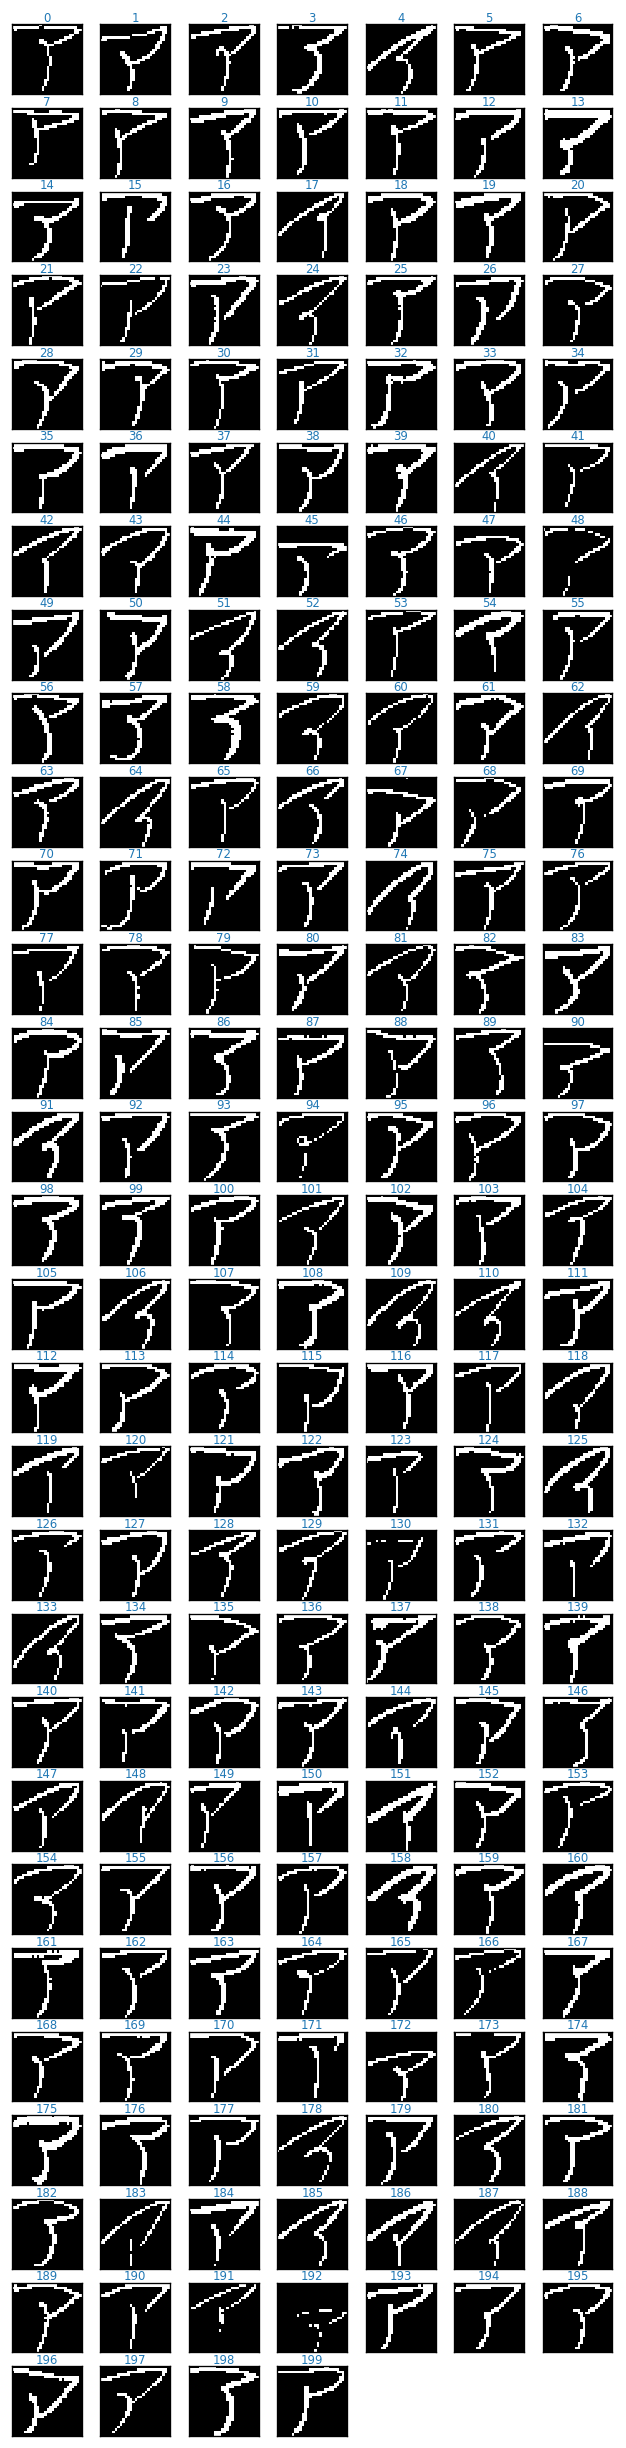

In [18]:
train_data_a_image = np.array(train_data_a).reshape(200, 28, 28)

# matplotlib 出力
n_cols = 7
n_rows = ((len(train_data_a_image)-1)//n_cols)+1
fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(6.5, 0.9*n_rows), dpi=120)
for i,ax in enumerate( np.ravel(ax) ):
  if i < len(train_data_a_image):
    ax.imshow(train_data_a_image[i],interpolation='nearest',vmin=0.,vmax=1.,cmap='Greys')

    # 目盛などを非表示に
    ax.tick_params(axis='both', which='both', left=False, labelleft=False, 
                   bottom=False, labelbottom=False)

    # 青色でインデックスを表示
    ax.set_title(i,fontsize=7,pad=1.5,color='tab:blue')

  else :
    ax.axis('off') # 余白処理

plt.show()

アの画像をjpgとして出力

In [25]:
pil_img = Image.fromarray(train_data_a_image[0])
# print(pil_img.mode)
# RGB
gray_img = pil_img.convert("L")
    
gray_img.save('../1_data/augmentor/a/original_a_image_0.jpg')

In [27]:
print(len(train_data_a_image))

200


In [28]:
for i in range(len(train_data_a_image)):
    pil_img = Image.fromarray(train_data_a_image[i])
# print(pil_img.mode)
# RGB
    gray_img = pil_img.convert("L")
    
    gray_img.save(f'../1_data/augmentor/a/original_a_image_{i}.jpg')

In [77]:
data_dict = {'0': train_data_a,
             '1': train_data_i,
             '2': train_data_u,
             '3': train_data_e,
             '4': train_data_o,
             '5': train_data_ka,
             '6': train_data_ki,
             '7': train_data_ku,
             '8': train_data_ke,
             '9': train_data_ko,
             '10': train_data_sa,
             '11': train_data_si,
             '12': train_data_su,
             '13': train_data_se,
             '14': train_data_so}

for i, j in list(data_dict.items()):
    j_ndarray = np.array(j).reshape(len(j), 28, 28)
    data_dict[i] = j_ndarray

print(np.array(data_dict['0']).shape)

for i, j in data_dict.items():
    for k in range(len(j)):
        pil_img = Image.fromarray(j[k])
# print(pil_img.mode)
# RGB
        gray_img = pil_img.convert("L")
    
        gray_img.save(f'../1_data/augmentor/a_to_so/{i}/original_a_image_{k}.png')

(200, 28, 28)


それぞれの文字ごとのデータセットを水増し

まずはアだけ水増ししてみる

In [57]:
print(train_data_a_image.shape)

(200, 28, 28)


In [61]:
# 回転を与える

for i in range(1):
    
    dpath_from = "../1_data/augmentor/a_to_so/1/%s"%i
    dpath_to = "../1_data/augmentor/a/%s"%i
    for dpath in [dpath_from, dpath_to]:
        if os.path.exists(dpath):
            """
            前回の結果が残っていたら消す
            """
            shutil.rmtree(dpath)
            
        
    # オブジェクトの生成
    p = Augmentor.Pipeline('../1_data/augmentor/a_to_so/1/')

    if i==0:
        p.rotate(probability=1.0, max_left_rotation=10, max_right_rotation=10)
#     elif i==1:
#         p.random_distortion(probability=1, grid_width=4, grid_height=4, magnitude=8)
#     elif i==2:
#         p.random_distortion(probability=1, grid_width=4, grid_height=4, magnitude=8)
#         p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    
    # 実行
    p.sample(len(train_data_a_image))
    
    # ディレクトリの名前を変更し移動
    os.rename("../1_data/augmentor/a_to_so/1/output", dpath_from)
    shutil.move(dpath_from, dpath_to)

Initialised with 200 image(s) found.
Output directory set to ../1_data/augmentor/a_to_so/1/output.

Processing <PIL.Image.Image image mode=L size=28x28


In [78]:
#データを回転して水増し

for i in range(len(data_dict)):
     # オブジェクトの生成
    p = Augmentor.Pipeline(f'../1_data/augmentor/a_to_so/{i}/')
    p.rotate(probability=1.0, max_left_rotation=10, max_right_rotation=10)
 
    # 実行
    p.sample(200)

Initialised with 200 image(s) found.
Output directory set to ../1_data/augmentor/a_to_so/0/output.

Processing <PIL.Image.Image image mode=L size=28x28


Initialised with 200 image(s) found.
Output directory set to ../1_data/augmentor/a_to_so/1/output.

Processing <PIL.Image.Image image mode=L size=28x28


Initialised with 201 image(s) found.
Output directory set to ../1_data/augmentor/a_to_so/2/output.

Processing <PIL.Image.Image image mode=L size=28x28


Initialised with 200 image(s) found.
Output directory set to ../1_data/augmentor/a_to_so/3/output.

Processing <PIL.Image.Image image mode=L size=28x28


Initialised with 200 image(s) found.
Output directory set to ../1_data/augmentor/a_to_so/4/output.

Processing <PIL.Image.Image image mode=L size=28x28


Initialised with 181 image(s) found.
Output directory set to ../1_data/augmentor/a_to_so/5/output.

Processing <PIL.Image.Image image mode=L size=28x28


Initialised with 157 image(s) found.
Output directory set to ../1_data/augmentor/a_to_so/6/output.

Processing <PIL.Image.Image image mode=L size=28x28


Initialised with 174 image(s) found.
Output directory set to ../1_data/augmentor/a_to_so/7/output.

Processing <PIL.Image.Image image mode=L size=28x28


Initialised with 142 image(s) found.
Output directory set to ../1_data/augmentor/a_to_so/8/output.

Processing <PIL.Image.Image image mode=L size=28x28


Initialised with 170 image(s) found.
Output directory set to ../1_data/augmentor/a_to_so/9/output.

Processing <PIL.Image.Image image mode=L size=28x28


Initialised with 125 image(s) found.
Output directory set to ../1_data/augmentor/a_to_so/10/output.

Processing <PIL.Image.Image image mode=L size=28x28


Initialised with 158 image(s) found.
Output directory set to ../1_data/augmentor/a_to_so/11/output.

Processing <PIL.Image.Image image mode=L size=28x28


Initialised with 174 image(s) found.
Output directory set to ../1_data/augmentor/a_to_so/12/output.

Processing <PIL.Image.Image image mode=L size=28x28


Initialised with 146 image(s) found.
Output directory set to ../1_data/augmentor/a_to_so/13/output.

Processing <PIL.Image.Image image mode=L size=28x28


Initialised with 190 image(s) found.
Output directory set to ../1_data/augmentor/a_to_so/14/output.

Processing <PIL.Image.Image image mode=L size=28x28


水増しした画像を読み込んで元のデータセットと合体する

In [73]:
im = Image.open('../1_data/augmentor/a_to_so/0/output/*.jpg')

FileNotFoundError: [Errno 2] No such file or directory: '../1_data/augmentor/a_to_so/0/output/*.jpg'

In [72]:
print(np.array(im).shape)

(28, 28)


In [101]:
# 画像が保存されたフォルダのパスを指定する
folder_path = "../1_data/augmentor/a_to_so/14/output"

# フォルダ内のjpeg画像を読み込む
image_list = []
for filename in os.listdir(folder_path):
    if filename.endswith(".png"):
        image_path = os.path.join(folder_path, filename)
        with Image.open(image_path) as img:
            image_list.append(np.asarray(img))

# すべての画像を1つのndarrayの3次元配列に変換する
image_array = np.stack(image_list)

# image_arrayのshapeを表示する
print(image_array.shape)

(200, 28, 28)


画像を表示して確認する

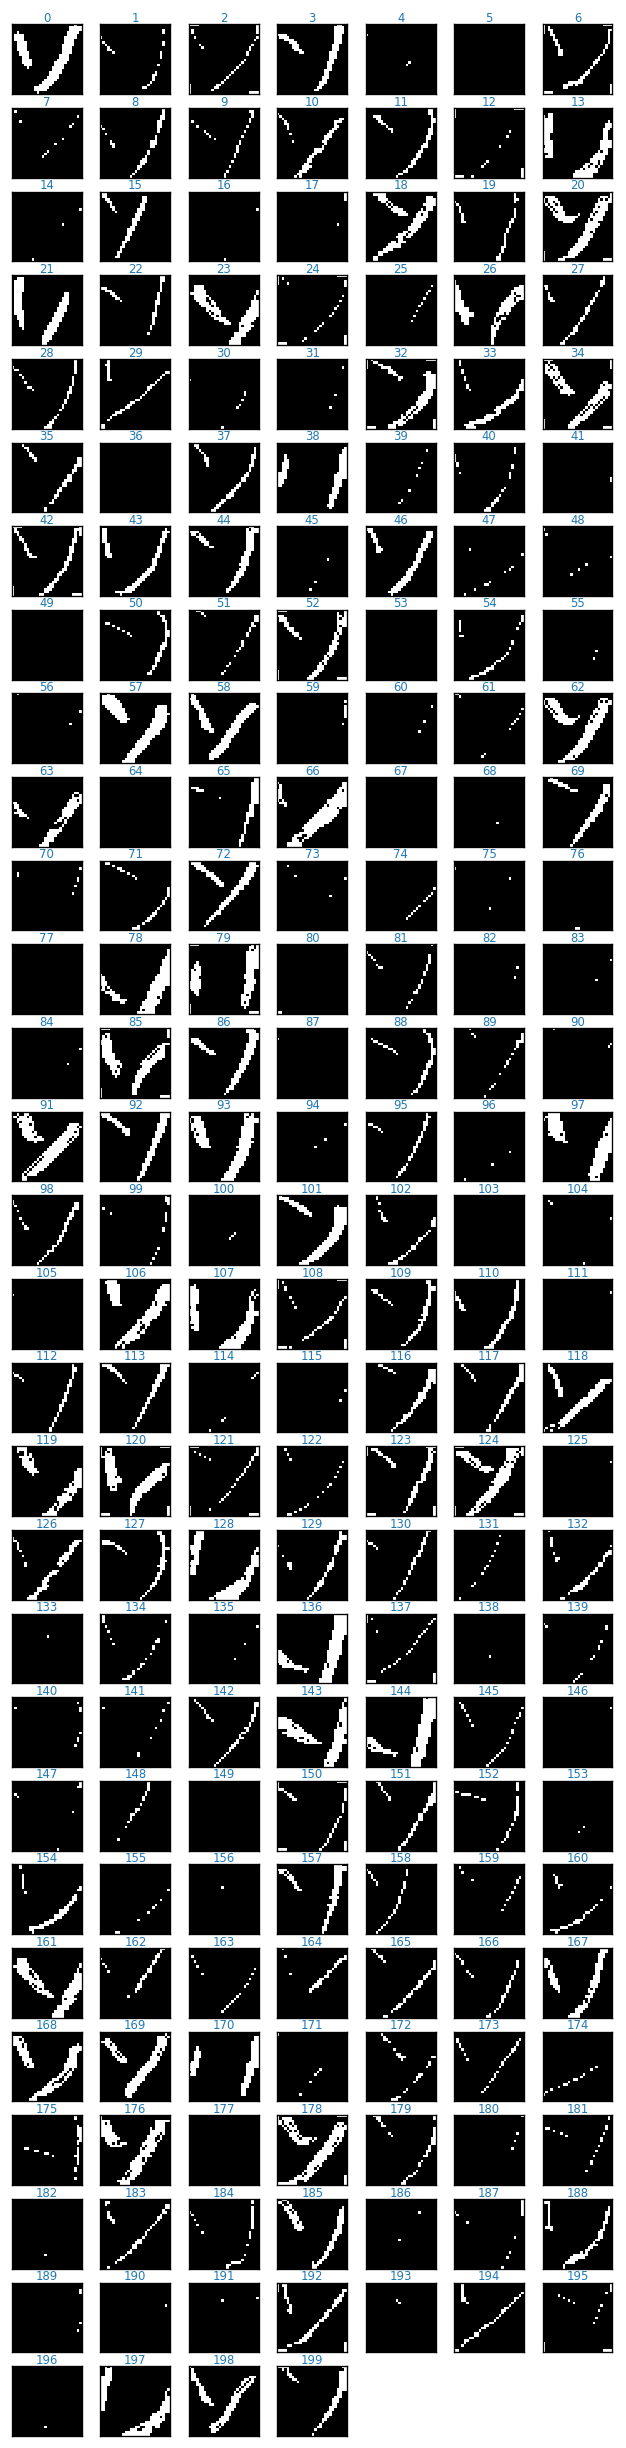

In [113]:
# matplotlib 出力
n_cols = 7
n_rows = ((len(image_array)-1)//n_cols)+1
fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(6.5, 0.9*n_rows), dpi=120)
for i,ax in enumerate( np.ravel(ax) ):
  if i < len(image_array):
    ax.imshow(image_array[i],interpolation='nearest',vmin=0.,vmax=1.,cmap='Greys')

    # 目盛などを非表示に
    ax.tick_params(axis='both', which='both', left=False, labelleft=False, 
                   bottom=False, labelbottom=False)

    # 青色でインデックスを表示
    ax.set_title(i,fontsize=7,pad=1.5,color='tab:blue')

  else :
    ax.axis('off') # 余白処理

plt.show()

目視で人が判別できないものは削除

In [6]:
del_candidate_so = [4, 5, 12, 14, 16,
                    17, 25, 30, 31, 33,
                    36, 39, 41, 45, 49,
                    53, 55, 56, 59, 60,
                    64, 67, 68, 70, 73,
                    74, 75, 76, 77, 80,
                    82, 83, 84, 87, 90,
                    94, 96, 100, 103, 104,
                    105, 111, 114, 115, 125,
                    131, 133, 135, 137, 138,
                    146, 148, 149, 153, 155, 156,
                    164, 171, 174, 177, 180,
                    182, 186, 189, 190, 191,
                    193, 196]

In [7]:
del_candidate_se = [6, 7, 11, 17, 20,
                    25, 30, 31, 33, 34,
                    41, 43, 46, 47, 49,
                    52, 57, 60, 61, 62,
                    63, 64, 76, 79, 92,
                    94, 95, 96, 97, 103,
                    104, 111, 114, 118, 123,
                    126, 127, 129, 131, 132,
                    133, 143, 145, 147, 148,
                    150, 159, 162, 166, 169,
                    171, 173, 177, 178, 181,
                    185, 194, 196, 199]

In [8]:
del_candidate_su = [4, 5, 8, 10, 12,
                    14, 15, 20, 21, 24,
                    27, 28, 30, 34, 35,
                    36, 37, 39, 40, 41,
                    47, 49, 51, 52, 54,
                    57, 59, 62, 63, 65,
                    66, 67, 69, 73, 74,
                    75, 76, 81, 90, 92,
                    94, 97, 101, 108, 115,
                    116, 120, 121, 123, 125,
                    126, 130, 132, 138, 141,
                    147, 148, 149, 150, 151,
                    154, 156, 160, 167, 169,
                    172, 174, 175, 178, 183,
                    184, 189]

In [9]:
del_candidate_si = [3, 9, 10, 15, 18,
                    19, 20, 21, 26, 30,
                    33, 34, 35, 37, 40,
                    42, 48, 51, 55, 56,
                    58, 71, 73, 76, 77,
                    78, 82, 83, 84, 88,
                    90, 96, 100, 101, 102, 104,
                    106, 107, 115, 116, 118,
                    119, 120, 124, 128, 129,
                    131, 134, 140, 143, 145,
                    153, 160, 169, 170, 173,
                    176, 177, 180, 181, 186,
                    190, 199]

In [10]:
del_candidate_sa = [1, 5, 7, 10, 11,
                    12, 13, 21, 22, 25,
                    26, 27, 29, 33, 36,
                    38, 39, 41, 42, 43,
                    48, 51, 52, 53, 55,
                    57, 58, 59, 62, 63,
                    64, 66, 67, 69, 71,
                    73, 79, 83, 85, 87,
                    88, 89, 90, 95, 101,
                    102, 104, 105, 107, 109,
                    111, 114, 120, 124, 125,
                    126, 127, 129, 130, 132,
                    134, 135, 142, 143, 145,
                    149, 151, 152, 153, 154,
                    159, 160, 166, 168, 169,
                    170, 172, 175, 176, 178,
                    180, 183, 184, 189, 192,
                    193, 196, 198]

In [11]:
del_candidate_ko = [0, 1, 4, 20, 25,
                    28, 30, 31, 35, 36,
                    38, 39, 40, 43, 47,
                    48, 49, 50, 52, 63, 64,
                    68, 76, 80, 86, 89,
                    92, 93, 94, 95, 96,
                    104, 109, 112, 124, 125,
                    126, 128, 139, 140, 141,
                    142, 144, 145, 146, 147,
                    149, 150, 151, 154, 155,
                    159, 166, 168, 173, 179, 184,
                    187, 188, 190, 193, 194]

In [12]:
del_candidate_ke = [9, 10, 11, 13, 14,
                    16, 17, 20, 21, 24,
                    26, 28, 35, 37, 38,
                    39, 41, 42, 43, 44, 45,
                    47, 54, 55, 57, 58,
                    60, 65, 66, 68, 70,
                    73, 75, 77, 81, 85,
                    89, 90, 95, 96, 97,
                    100, 101, 104, 106, 107,
                    109, 112, 113, 114, 118,
                    120, 121, 123, 125, 127,
                    130, 132, 134, 137, 138, 139,
                    141, 143, 145, 146, 149,
                    150, 152, 153, 154, 157,
                    159, 160, 161, 162, 166,
                    167, 168, 169, 170, 172,
                    175, 182, 183, 187, 189,
                    190, 192, 193, 196, 197]

In [13]:
del_candidate_ku = [0, 2, 5, 6, 8,
                    9, 10, 15, 16, 18,
                    19, 21, 24, 25, 26,
                    27, 37, 38, 40, 41,
                    42, 43, 48, 52, 53,
                    54, 57, 59, 60, 61,
                    62, 63, 64, 65, 67,
                    68, 69, 70, 71, 73,
                    79, 83, 86, 87, 88,
                    91, 94, 95, 97, 98,
                    100, 103, 105, 106, 108,
                    109, 113, 114, 126, 127,
                    129, 131, 133, 136, 138,
                    143, 149, 152, 155, 156,
                    157, 160, 161, 162, 170,
                    171, 175, 177, 179, 180,
                    182, 185, 189, 191, 196,
                    197, 198]

In [14]:
del_candidate_ki = [3, 4, 5, 7, 21,
                    23, 27, 28, 32, 36,
                    37, 41, 46, 47, 48,
                    55, 56, 58, 62, 75,
                    82, 84, 89, 90, 91,
                    94, 101, 110, 116, 120,
                    122, 127, 128, 134, 135,
                    142, 143, 144, 145, 150,
                    154, 156, 159, 160, 162,
                    163, 167, 169, 170, 171,
                    174, 179, 185, 192, 195]

In [15]:
del_candidate_ka = [0, 1, 2, 3, 4,
                    5, 6, 7, 8, 11,
                    14, 16, 20, 21, 25,
                    26, 27, 28, 29, 30,
                    32, 37, 39, 41, 42,
                    43, 44, 45, 47, 48,
                    49, 50, 51, 53, 55,
                    58, 60, 62, 66, 66,
                    67, 68, 69, 72, 73,
                    76, 77, 82, 85, 86,
                    87, 89, 90, 95, 96,
                    98, 102, 107, 112, 114,
                    116, 117, 120, 122, 124,
                    126, 131, 132, 134, 135,
                    137, 138, 142, 143, 144,
                    145, 146, 147, 148, 150,
                    152, 153, 154, 159, 162,
                    165, 170, 172, 177, 181,
                    182, 184, 185, 187, 188,
                    190, 191, 192, 196, 198]

In [16]:
del_candidate_o = [5, 16, 28, 30, 35,
                   43, 47, 61, 70, 75,
                   76, 92, 93, 103, 111,
                   121, 122, 125, 146, 153,
                   165, 168, 186, 189, 192,
                   196, 198]

In [17]:
del_candidate_e = [37, 62, 68, 97, 163,
                   192]

In [18]:
del_candidate_u = [80, 161, 189]

In [19]:
del_candidate_i = [26, 34, 35, 76, 93, 128,
                   142]

In [20]:
del_candidate_a = [0, 3, 12, 15, 21,
                   27, 28, 38, 53, 60, 69, 72,
                   75, 81, 88, 92, 97, 101,
                   111, 116, 133, 140, 142,
                   145, 148, 149, 157, 164,
                   168, 169, 170, 180, 197, 198]

In [74]:
aug_data_a_image_w_pre_prcs_ls = []
for i in range(len(image_array)):
    if i not in del_candidate_a: aug_data_a_image_w_pre_prcs_ls.append(image_array[i])

aug_data_a_image_w_pre_prcs = np.array(aug_data_a_image_w_pre_prcs_ls)

print(aug_data_a_image_w_pre_prcs.shape)
print(aug_data_a_image_w_pre_prcs)

(166, 28, 28)
[[[255 255 255 ...  52  50  51]
  [255 255 255 ...   4  62  28]
  [255 255 255 ... 152 177  43]
  ...
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]]

 [[255 254 255 ...   9   0 155]
  [255 255 240 ...   1   0  14]
  [255 255  92 ...   0   0  80]
  ...
  [170  28   0 ... 255 255 255]
  [  0   5  43 ... 255 255 255]
  [  0  77 255 ... 255 255 255]]

 [[  0   0   0 ... 137 242   0]
  [ 74  44  45 ...   0  86   0]
  [  0   0   0 ...   0   0   0]
  ...
  [  0 255 255 ... 255 255 255]
  [  0 255 255 ... 255 255 255]
  [  0 255 255 ...   0   0   0]]

 ...

 [[255 253 239 ... 255 252 254]
  [140 164  88 ... 203 184 210]
  [ 18  18   4 ...  30  24  64]
  ...
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]]

 [[255 255 255 ... 255  90 113]
  [255 255 255 ...  86  32  45]
  [255 255 255 ...   0   0   6]
  ...
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255

In [76]:
aug_data_i_image_w_pre_prcs_ls = []
for i in range(len(image_array)):
    if i not in del_candidate_i: aug_data_i_image_w_pre_prcs_ls.append(image_array[i])

aug_data_i_image_w_pre_prcs = np.array(aug_data_i_image_w_pre_prcs_ls)

print(aug_data_i_image_w_pre_prcs.shape)
print(aug_data_i_image_w_pre_prcs)

(193, 28, 28)
[[[255 255 255 ...   3  45 174]
  [255 255 255 ...   0  41 249]
  [255 255 255 ...   6  92 255]
  ...
  [255 254 255 ... 255 255 255]
  [255 251 248 ... 255 255 255]
  [250 255 163 ... 255 255 255]]

 [[255 255 255 ... 255 250 211]
  [255 255 255 ... 245 149  51]
  [255 255 255 ...  88  33   0]
  ...
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]]

 [[255 255 255 ...   3  55 220]
  [255 255 255 ...  10 124 253]
  [255 255 255 ...  60 240 255]
  ...
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]]

 ...

 [[255 255 255 ...   0   0 152]
  [255 255 255 ...   0   9 185]
  [255 255 255 ... 187 255 255]
  ...
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]]

 [[234 255 255 ... 255 255 255]
  [245 255 255 ... 255 255 255]
  [255 254 255 ... 255 255 255]
  ...
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255

In [78]:
aug_data_u_image_w_pre_prcs_ls = []
for i in range(len(image_array)):
    if i not in del_candidate_u: aug_data_u_image_w_pre_prcs_ls.append(image_array[i])

aug_data_u_image_w_pre_prcs = np.array(aug_data_u_image_w_pre_prcs_ls)

print(aug_data_u_image_w_pre_prcs.shape)
print(aug_data_u_image_w_pre_prcs)

(195, 28, 28)
[[[131  98 182 ... 255 255 255]
  [ 66  21  68 ... 255 255 255]
  [ 58   6   7 ... 255 255 255]
  ...
  [203 215 221 ... 255 255 255]
  [ 58  86 102 ... 255 255 255]
  [  0   0   0 ... 255 255 255]]

 [[255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  ...
  [255 255 254 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]]

 [[255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  ...
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]]

 ...

 [[255 255 204 ... 255 255 255]
  [255 255 227 ... 255 255 255]
  [255 255 248 ... 255 255 255]
  ...
  [255 255 255 ... 255 255 255]
  [254 253 240 ... 255 255 255]
  [255 244 168 ... 255 255 255]]

 [[255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 254 ... 255 255 255]
  ...
  [255 254 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255

In [80]:
aug_data_e_image_w_pre_prcs_ls = []
for i in range(len(image_array)):
    if i not in del_candidate_e: aug_data_e_image_w_pre_prcs_ls.append(image_array[i])

aug_data_e_image_w_pre_prcs = np.array(aug_data_e_image_w_pre_prcs_ls)

print(aug_data_e_image_w_pre_prcs.shape)
print(aug_data_e_image_w_pre_prcs)

(194, 28, 28)
[[[192 191 211 ... 255 255 254]
  [244 243 247 ... 254 255 255]
  [255 255 255 ... 170 230 248]
  ...
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 254 255]
  [255 255 255 ... 255 255 254]]

 [[ 43  40  22 ... 255 255 252]
  [  4   2   0 ... 207 246 254]
  [ 26  40  49 ...  69 153 255]
  ...
  [255 255 255 ...   0   0  22]
  [255 255 255 ...  19  13  13]
  [255 255 255 ...  97  75  95]]

 [[ 29  12   1 ... 255 255 255]
  [  5   2   0 ... 255 255 255]
  [ 26   3   0 ... 255 255 255]
  ...
  [179  21   0 ... 255 255 255]
  [234 102  40 ... 255 255 255]
  [255 255 156 ... 255 255 255]]

 ...

 [[151  11   0 ... 255 255 255]
  [170   5   0 ... 229 255 255]
  [236 176 102 ... 127 255 255]
  ...
  [255 255 255 ...  86 217 255]
  [255 255 255 ... 255 255 255]
  [255 255 254 ... 255 254 255]]

 [[245 244 232 ... 255 255 255]
  [157 138 111 ... 255 255 255]
  [ 37  29  20 ... 255 255 255]
  ...
  [255 255 255 ...  22  29  38]
  [252 233 243 ... 119 136 160]
  [240 138 190

In [82]:
aug_data_o_image_w_pre_prcs_ls = []
for i in range(len(image_array)):
    if i not in del_candidate_o: aug_data_o_image_w_pre_prcs_ls.append(image_array[i])

aug_data_o_image_w_pre_prcs = np.array(aug_data_o_image_w_pre_prcs_ls)

print(aug_data_o_image_w_pre_prcs.shape)
print(aug_data_o_image_w_pre_prcs)

(173, 28, 28)
[[[255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  ...
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]]

 [[255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  ...
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]]

 [[  0 255 255 ...   0   0   0]
  [  0 255 255 ... 255 255 255]
  [  0 255 255 ... 255 255 255]
  ...
  [255 255 255 ... 255 255   0]
  [255 255 255 ... 255 255   0]
  [  0   0   0 ... 255 255   0]]

 ...

 [[255 255 255 ... 255 255 255]
  [255 255 255 ... 180 215 231]
  [255 255 255 ...  21  26  28]
  ...
  [255 254 245 ... 255 255 255]
  [255 255 184 ... 255 255 255]
  [255 255 225 ... 255 255 255]]

 [[255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  ...
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255

In [84]:
aug_data_ka_image_w_pre_prcs_ls = []
for i in range(len(image_array)):
    if i not in del_candidate_ka: aug_data_ka_image_w_pre_prcs_ls.append(image_array[i])

aug_data_ka_image_w_pre_prcs = np.array(aug_data_ka_image_w_pre_prcs_ls)

print(aug_data_ka_image_w_pre_prcs.shape)
print(aug_data_ka_image_w_pre_prcs)

(101, 28, 28)
[[[254 254 254 ... 253 253 253]
  [253 253 253 ... 255 255 255]
  [253 255 255 ... 193 223 255]
  ...
  [254 254 254 ... 254 254 254]
  [254 254 254 ... 254 254 254]
  [254 254 254 ... 254 254 254]]

 [[254 254 254 ... 254 254 254]
  [254 254 254 ... 254 254 254]
  [254 254 254 ... 253 253 253]
  ...
  [195 172 246 ... 254 254 254]
  [218 255 255 ... 254 254 254]
  [255 255 252 ... 254 254 254]]

 [[254 254 254 ... 254 254 254]
  [254 254 254 ... 254 254 254]
  [254 254 254 ... 254 254 254]
  ...
  [255 255 254 ... 233 255 255]
  [255 253 253 ... 255 254 254]
  [253 253 254 ... 254 252 253]]

 ...

 [[254 254 254 ... 254 254 254]
  [254 254 254 ... 254 254 254]
  [254 254 254 ... 254 254 254]
  ...
  [254 254 254 ... 254 254 254]
  [254 254 254 ... 254 254 254]
  [254 254 254 ... 254 254 254]]

 [[254 254 254 ... 255 255 252]
  [254 254 254 ... 208 255 255]
  [254 254 254 ...  77 133 240]
  ...
  [  0   8  33 ... 253 254 254]
  [ 53  89 152 ... 253 254 254]
  [191 255 255

In [86]:
aug_data_ki_image_w_pre_prcs_ls = []
for i in range(len(image_array)):
    if i not in del_candidate_ki: aug_data_ki_image_w_pre_prcs_ls.append(image_array[i])

aug_data_ki_image_w_pre_prcs = np.array(aug_data_ki_image_w_pre_prcs_ls)

print(aug_data_ki_image_w_pre_prcs.shape)
print(aug_data_ki_image_w_pre_prcs)

(145, 28, 28)
[[[254 254 254 ... 255 254 254]
  [254 254 254 ... 255 255 255]
  [254 254 254 ...  71 225 255]
  ...
  [254 254 254 ... 255 255 255]
  [254 254 254 ...   0 108 253]
  [254 254 254 ...   0  69 255]]

 [[254 254 254 ... 254 254 254]
  [254 254 254 ... 254 254 254]
  [254 254 254 ... 254 254 254]
  ...
  [254 254 254 ...   0 111 250]
  [254 253 254 ...  92   0 146]
  [254 254 253 ... 255  77   0]]

 [[  0  40  72 ... 253 254 254]
  [  0   7  13 ... 253 254 254]
  [  0   0   0 ... 253 254 254]
  ...
  [254 254 254 ... 117  34   0]
  [254 254 254 ... 246 153  39]
  [254 254 254 ... 255 252 220]]

 ...

 [[254 254 254 ... 254 253 253]
  [253 253 253 ... 255 255 255]
  [253 255 255 ... 136 152 185]
  ...
  [254 254 253 ... 255 253 254]
  [254 254 254 ... 247 255 253]
  [254 254 254 ... 211 255 252]]

 [[254 254 254 ... 255 253 254]
  [254 254 254 ... 255 253 254]
  [254 254 254 ... 251 253 254]
  ...
  [254 254 254 ... 254 254 254]
  [254 254 254 ... 254 254 254]
  [254 254 254

In [88]:
aug_data_ku_image_w_pre_prcs_ls = []
for i in range(len(image_array)):
    if i not in del_candidate_ku: aug_data_ku_image_w_pre_prcs_ls.append(image_array[i])

aug_data_ku_image_w_pre_prcs = np.array(aug_data_ku_image_w_pre_prcs_ls)

print(aug_data_ku_image_w_pre_prcs.shape)
print(aug_data_ku_image_w_pre_prcs)

(113, 28, 28)
[[[254 254 254 ... 254 254 254]
  [254 254 254 ... 254 254 254]
  [254 254 254 ... 255 255 254]
  ...
  [254 254 254 ... 254 254 254]
  [254 254 254 ... 254 254 254]
  [254 254 254 ... 254 254 254]]

 [[254 254 254 ... 254 254 254]
  [254 254 254 ... 254 254 254]
  [254 254 254 ... 253 253 253]
  ...
  [102  63  51 ... 254 254 254]
  [  0   0   0 ... 254 254 254]
  [174  35  19 ... 254 254 254]]

 [[255 255 107 ... 254 254 254]
  [254 255  84 ... 253 253 254]
  [249 255 255 ... 254 254 253]
  ...
  [254 253 254 ... 254 254 254]
  [254 253 255 ... 254 254 254]
  [254 253 255 ... 254 254 254]]

 ...

 [[  0 253 253 ...   0   0   0]
  [  0 254 253 ... 253 254 254]
  [  0 254 253 ... 253 253 253]
  ...
  [254 253 253 ... 254 254   0]
  [254 253 255 ... 254 254   0]
  [  0   0   0 ... 254 254   0]]

 [[253 250 255 ... 254 254 254]
  [253 255 189 ... 254 254 254]
  [253 255 161 ... 254 254 254]
  ...
  [242 164  49 ... 253 253 255]
  [211 160 148 ... 253 255 234]
  [240 242 245

In [90]:
aug_data_ke_image_w_pre_prcs_ls = []
for i in range(len(image_array)):
    if i not in del_candidate_ke: aug_data_ke_image_w_pre_prcs_ls.append(image_array[i])

aug_data_ke_image_w_pre_prcs = np.array(aug_data_ke_image_w_pre_prcs_ls)

print(aug_data_ke_image_w_pre_prcs.shape)
print(aug_data_ke_image_w_pre_prcs)

(108, 28, 28)
[[[254 254 254 ... 254 254 254]
  [254 254 254 ... 254 254 254]
  [254 254 254 ... 253 253 253]
  ...
  [254 254 254 ... 254 254 254]
  [254 254 253 ... 254 254 254]
  [254 254 253 ... 254 254 254]]

 [[  0 254 254 ...   0   0   0]
  [  0 254 254 ... 254 254 254]
  [  0 254 254 ... 254 254 254]
  ...
  [254 254 254 ... 254 254   0]
  [254 254 254 ... 254 254   0]
  [  0   0   0 ... 254 254   0]]

 [[253 255 179 ... 254 254 254]
  [253 255 159 ... 254 254 254]
  [253 255 109 ... 254 254 254]
  ...
  [253 253 253 ... 254 254 254]
  [254 254 254 ... 254 254 254]
  [254 254 254 ... 254 254 254]]

 ...

 [[254 254 254 ... 254 254 254]
  [254 254 254 ... 254 254 254]
  [254 254 254 ... 254 254 254]
  ...
  [254 254 254 ... 254 254 254]
  [254 254 254 ... 254 254 254]
  [254 254 254 ... 254 254 254]]

 [[253 254 255 ... 253 254 253]
  [254 254 255 ... 254 253 255]
  [253 255 249 ... 255 255 253]
  ...
  [255 253 253 ... 254 254 254]
  [253 254 254 ... 254 254 254]
  [254 254 254

In [92]:
aug_data_ko_image_w_pre_prcs_ls = []
for i in range(len(image_array)):
    if i not in del_candidate_ko: aug_data_ko_image_w_pre_prcs_ls.append(image_array[i])

aug_data_ko_image_w_pre_prcs = np.array(aug_data_ko_image_w_pre_prcs_ls)

print(aug_data_ko_image_w_pre_prcs.shape)
print(aug_data_ko_image_w_pre_prcs)

(138, 28, 28)
[[[251 255 152 ... 217 171  89]
  [253 251 247 ...  25  34  23]
  [254 253 254 ...   0   1   1]
  ...
  [  0   8  94 ...  34 204 255]
  [ 22  13   1 ...  69 255 255]
  [ 86 108  77 ...  93 255 253]]

 [[  0   0   0 ...  43  59   0]
  [  5  87 213 ... 121  18   0]
  [ 75 190 229 ... 211  23   0]
  ...
  [  0 253 253 ... 254 254 254]
  [  0 254 254 ... 254 254 254]
  [  0 254 254 ...   0   0   0]]

 [[254 254 254 ...   0 127 255]
  [254 254 254 ...   0   0 255]
  [254 254 254 ...   0   0 255]
  ...
  [ 35   0   0 ... 254 254 254]
  [ 86   0   0 ... 254 254 254]
  [255 135   0 ... 254 254 254]]

 ...

 [[254 254 254 ... 202 255 251]
  [254 254 254 ...  82 255 255]
  [252 252 251 ...   7 189 255]
  ...
  [254 254 254 ... 254 254 253]
  [254 254 254 ... 253 254 254]
  [254 254 254 ... 254 254 254]]

 [[250 246 251 ... 251 254 254]
  [255 255 255 ... 253 254 254]
  [ 87  71  47 ... 254 253 254]
  ...
  [254 253 254 ...  46  71  95]
  [254 253 252 ... 255 255 255]
  [252 250 254

In [94]:
aug_data_sa_image_w_pre_prcs_ls = []
for i in range(len(image_array)):
    if i not in del_candidate_sa: aug_data_sa_image_w_pre_prcs_ls.append(image_array[i])

aug_data_sa_image_w_pre_prcs = np.array(aug_data_sa_image_w_pre_prcs_ls)

print(aug_data_sa_image_w_pre_prcs.shape)
print(aug_data_sa_image_w_pre_prcs)

(112, 28, 28)
[[[254 254 254 ... 254 254 254]
  [254 254 254 ... 254 254 254]
  [254 254 254 ... 254 254 254]
  ...
  [254 254 254 ... 254 254 254]
  [254 254 254 ... 254 254 254]
  [254 254 254 ... 254 254 254]]

 [[  0   0   0 ... 254 254   0]
  [255 255 189 ... 254 254   0]
  [228 156  11 ... 254 254   0]
  ...
  [  0 254 254 ... 254 254 254]
  [  0 254 254 ... 254 254 254]
  [  0 254 254 ...   0   0   0]]

 [[254 254 254 ... 254 254 254]
  [254 254 254 ... 254 254 254]
  [254 254 254 ... 254 254 254]
  ...
  [254 254 254 ... 254 254 254]
  [254 254 254 ... 254 254 254]
  [254 254 254 ... 254 254 254]]

 ...

 [[254 254 254 ... 254 254 254]
  [253 253 254 ... 254 254 254]
  [255 254 253 ... 254 254 254]
  ...
  [254 254 254 ... 254 254 254]
  [254 254 254 ... 254 254 254]
  [254 254 254 ... 254 254 254]]

 [[254 254 254 ... 254 254 254]
  [254 254 254 ... 254 254 254]
  [254 254 254 ... 254 254 254]
  ...
  [254 254 254 ... 254 254 254]
  [254 254 254 ... 254 254 254]
  [254 254 254

In [96]:
aug_data_si_image_w_pre_prcs_ls = []
for i in range(len(image_array)):
    if i not in del_candidate_si: aug_data_si_image_w_pre_prcs_ls.append(image_array[i])

aug_data_si_image_w_pre_prcs = np.array(aug_data_si_image_w_pre_prcs_ls)

print(aug_data_si_image_w_pre_prcs.shape)
print(aug_data_si_image_w_pre_prcs)

(137, 28, 28)
[[[255 255 126 ... 254 254 254]
  [245 142   4 ... 254 254 254]
  [233  78   0 ... 253 253 253]
  ...
  [254 254 254 ... 253 254 254]
  [254 254 254 ... 254 253 254]
  [254 254 254 ... 254 254 254]]

 [[  0  45  52 ... 254 254 254]
  [  3  12  19 ... 254 254 254]
  [ 76 147 179 ... 254 254 254]
  ...
  [254 254 254 ... 254 254 254]
  [254 254 254 ... 254 254 254]
  [254 254 254 ... 254 254 254]]

 [[ 38 126 237 ... 254 254 254]
  [247  59   0 ... 254 254 254]
  [255 255 255 ... 254 254 254]
  ...
  [254 254 254 ... 254 254 254]
  [254 254 254 ... 254 254 254]
  [254 254 254 ... 254 254 254]]

 ...

 [[135  59   0 ... 254 254 254]
  [  0   0   0 ... 254 254 254]
  [153  62   1 ... 254 254 254]
  ...
  [253 255 247 ... 254 254 254]
  [253 255 253 ... 254 254 254]
  [253 253 255 ... 254 254 254]]

 [[  0   0   0 ... 254 254   0]
  [  0  23 121 ... 254 254   0]
  [ 84  37   0 ... 254 254   0]
  ...
  [  0 254 254 ... 254 254 254]
  [  0 254 254 ... 254 254 254]
  [  0 254 254

In [98]:
aug_data_su_image_w_pre_prcs_ls = []
for i in range(len(image_array)):
    if i not in del_candidate_su: aug_data_su_image_w_pre_prcs_ls.append(image_array[i])

aug_data_su_image_w_pre_prcs = np.array(aug_data_su_image_w_pre_prcs_ls)

print(aug_data_su_image_w_pre_prcs.shape)
print(aug_data_su_image_w_pre_prcs)

(128, 28, 28)
[[[212  40  60 ... 253 254 254]
  [252 239 236 ... 253 254 254]
  [254 255 255 ... 254 254 254]
  ...
  [255 255 246 ... 255 255 253]
  [254 254 255 ... 234 251 255]
  [253 253 253 ...  54 202 255]]

 [[217  95  17 ... 254 254 254]
  [251 226 197 ... 254 254 254]
  [255 255 252 ... 254 254 254]
  ...
  [252 255 213 ... 250 254 254]
  [252 255 255 ... 180 216 250]
  [253 254 255 ...   0  47 211]]

 [[255 255 255 ... 254 254 254]
  [ 79  56  31 ... 254 254 254]
  [  6   2   0 ... 254 254 254]
  ...
  [254 254 254 ... 253 254 253]
  [254 254 254 ... 254 254 254]
  [254 254 254 ... 254 254 254]]

 ...

 [[255 255 255 ... 254 254 254]
  [198 168 126 ... 254 254 254]
  [ 51  35  16 ... 254 254 254]
  ...
  [254 254 254 ... 254 254 254]
  [254 254 254 ... 254 254 254]
  [254 254 254 ... 254 254 254]]

 [[254 254 253 ... 175 130 103]
  [254 254 253 ...  48  23  18]
  [254 254 254 ...   0   0   0]
  ...
  [ 49 108 152 ... 253 252 253]
  [190 255 255 ... 254 252 253]
  [255 255 253

In [100]:
aug_data_se_image_w_pre_prcs_ls = []
for i in range(len(image_array)):
    if i not in del_candidate_se: aug_data_se_image_w_pre_prcs_ls.append(image_array[i])

aug_data_se_image_w_pre_prcs = np.array(aug_data_se_image_w_pre_prcs_ls)

print(aug_data_se_image_w_pre_prcs.shape)
print(aug_data_se_image_w_pre_prcs)

(141, 28, 28)
[[[255 255 177 ... 254 254 254]
  [255 255 155 ... 254 253 253]
  [254 255 141 ... 254 255 255]
  ...
  [196  59   4 ... 252 254 253]
  [255 162  47 ... 252 253 254]
  [255 248 139 ... 255 252 254]]

 [[254 254 254 ... 255 255 255]
  [253 253 254 ... 237 213 114]
  [254 254 253 ...  28  26  14]
  ...
  [254 254 254 ... 227 246 255]
  [254 254 254 ...  67 157 247]
  [254 254 254 ...   2   9 145]]

 [[253 254 255 ... 254 255 255]
  [253 254 255 ... 255 243 235]
  [254 253 255 ... 177 108  44]
  ...
  [254 254 254 ... 155 103 143]
  [254 254 254 ...   4  24  19]
  [254 254 254 ... 132 251 255]]

 ...

 [[254 254 254 ... 203 235 244]
  [254 254 254 ...  59 184 251]
  [254 254 254 ...  19 170 255]
  ...
  [254 254 254 ... 255 255 253]
  [254 254 254 ... 255 254 253]
  [254 254 254 ... 255 250 254]]

 [[254 254 254 ... 254 254 254]
  [254 254 254 ... 254 254 254]
  [254 254 254 ... 254 254 254]
  ...
  [254 254 254 ... 245 255 253]
  [254 254 254 ... 255 255 253]
  [254 254 254

In [102]:
aug_data_so_image_w_pre_prcs_ls = []
for i in range(len(image_array)):
    if i not in del_candidate_so: aug_data_so_image_w_pre_prcs_ls.append(image_array[i])

aug_data_so_image_w_pre_prcs = np.array(aug_data_so_image_w_pre_prcs_ls)

print(aug_data_so_image_w_pre_prcs.shape)
print(aug_data_so_image_w_pre_prcs)

(132, 28, 28)
[[[254 254 254 ...   0  50 219]
  [253 253 252 ...   0   0   0]
  [255 255 255 ...   0   0   0]
  ...
  [254 254 254 ... 254 254 254]
  [254 254 254 ... 254 254 254]
  [254 254 254 ... 254 254 254]]

 [[249 252 254 ...  14  19 116]
  [255 254 253 ...   1  25 140]
  [255 254 253 ...   0  19 169]
  ...
  [254 254 254 ... 254 253 254]
  [254 254 254 ... 253 254 254]
  [254 254 254 ... 254 254 254]]

 [[  0   0   0 ... 254 254   0]
  [ 28 153 255 ... 254 254   0]
  [ 55   0 197 ... 253 253   0]
  ...
  [  0 254 253 ... 254 254 254]
  [  0 254 253 ... 254 254 254]
  [  0 253 255 ...   0   0   0]]

 ...

 [[121  20   0 ... 254 254 253]
  [ 49   9   0 ... 253 254 253]
  [ 20   4   0 ... 253 252 254]
  ...
  [254 254 254 ... 255 254 253]
  [254 254 254 ... 255 251 253]
  [253 253 253 ... 253 253 254]]

 [[  0  68 238 ... 253 253 253]
  [ 43   0 159 ... 255 255 253]
  [ 29   0  38 ... 207 254 255]
  ...
  [254 254 254 ... 254 254 254]
  [254 254 254 ... 254 254 254]
  [254 254 254

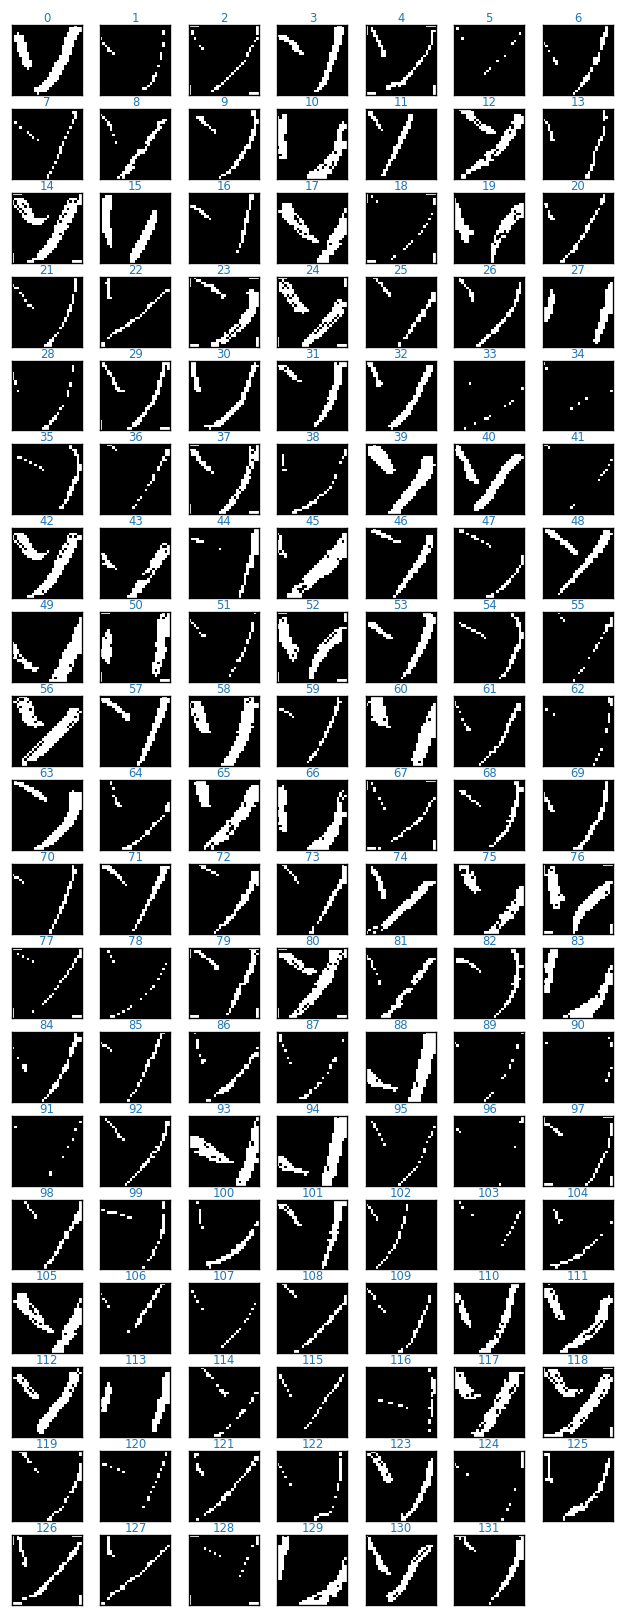

In [103]:
# matplotlib 出力
n_cols = 7
n_rows = ((len(aug_data_so_image_w_pre_prcs)-1)//n_cols)+1
fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(6.5, 0.9*n_rows), dpi=120)
for i,ax in enumerate( np.ravel(ax) ):
  if i < len(aug_data_so_image_w_pre_prcs):
    ax.imshow(aug_data_so_image_w_pre_prcs[i],interpolation='nearest',vmin=0.,vmax=1.,cmap='Greys')

    # 目盛などを非表示に
    ax.tick_params(axis='both', which='both', left=False, labelleft=False, 
                   bottom=False, labelbottom=False)

    # 青色でインデックスを表示
    ax.set_title(i,fontsize=7,pad=1.5,color='tab:blue')

  else :
    ax.axis('off') # 余白処理
    
plt.show()

元のデータセットと水増ししたデータを結合する

In [104]:
print(np.array(train_data_a).shape)
print(np.array(aug_data_a_image_w_pre_prcs).shape)

new_data_set_a = np.concatenate((np.array(train_data_a), np.array(aug_data_a_image_w_pre_prcs).reshape(166, 1, 28, 28)), axis=0)
print(new_data_set_a.shape)

(200, 1, 28, 28)
(166, 28, 28)
(366, 1, 28, 28)


In [105]:
one_hot_a = np.array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

new_label_a = np.tile(one_hot_a, (366, 1)).reshape(366, 15)
print(new_label_a.shape)
print(new_label_a)

(366, 15)
[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


In [106]:
print(np.array(train_data_i).shape)
print(np.array(aug_data_i_image_w_pre_prcs).shape)

new_data_set_i = np.concatenate((np.array(train_data_i), np.array(aug_data_i_image_w_pre_prcs).reshape(len(aug_data_i_image_w_pre_prcs), 1, 28, 28)), axis=0)
print(new_data_set_i.shape)

one_hot_i = np.array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

new_label_i = np.tile(one_hot_i, (len(new_data_set_i), 1)).reshape(len(new_data_set_i), 15)
print(new_label_i.shape)
print(new_label_i)

(200, 1, 28, 28)
(193, 28, 28)
(393, 1, 28, 28)
(393, 15)
[[0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]


In [107]:
print(np.array(train_data_u).shape)
print(np.array(aug_data_u_image_w_pre_prcs).shape)

new_data_set_u = np.concatenate((np.array(train_data_u), np.array(aug_data_u_image_w_pre_prcs).reshape(len(aug_data_u_image_w_pre_prcs), 1, 28, 28)), axis=0)
print(new_data_set_u.shape)

one_hot_u = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

new_label_u = np.tile(one_hot_u, (len(new_data_set_u), 1)).reshape(len(new_data_set_u), 15)
print(new_label_u.shape)
print(new_label_u)

(200, 1, 28, 28)
(195, 28, 28)
(395, 1, 28, 28)
(395, 15)
[[0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]]


In [108]:
print(np.array(train_data_e).shape)
print(np.array(aug_data_e_image_w_pre_prcs).shape)

new_data_set_e = np.concatenate((np.array(train_data_e), np.array(aug_data_e_image_w_pre_prcs).reshape(len(aug_data_e_image_w_pre_prcs), 1, 28, 28)), axis=0)
print(new_data_set_e.shape)

one_hot_e = np.array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

new_label_e = np.tile(one_hot_e, (len(new_data_set_e), 1)).reshape(len(new_data_set_e), 15)
print(new_label_e.shape)
print(new_label_e)

(200, 1, 28, 28)
(194, 28, 28)
(394, 1, 28, 28)
(394, 15)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [109]:
print(np.array(train_data_o).shape)
print(np.array(aug_data_o_image_w_pre_prcs).shape)

new_data_set_o = np.concatenate((np.array(train_data_o), np.array(aug_data_o_image_w_pre_prcs).reshape(len(aug_data_o_image_w_pre_prcs), 1, 28, 28)), axis=0)
print(new_data_set_o.shape)

one_hot_o = np.array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

new_label_o = np.tile(one_hot_o, (len(new_data_set_o), 1)).reshape(len(new_data_set_o), 15)
print(new_label_o.shape)
print(new_label_o)

(200, 1, 28, 28)
(173, 28, 28)
(373, 1, 28, 28)
(373, 15)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [110]:
print(np.array(train_data_ka).shape)
print(np.array(aug_data_ka_image_w_pre_prcs).shape)

new_data_set_ka = np.concatenate((np.array(train_data_ka), np.array(aug_data_ka_image_w_pre_prcs).reshape(len(aug_data_ka_image_w_pre_prcs), 1, 28, 28)), axis=0)
print(new_data_set_ka.shape)

one_hot_ka = np.array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

new_label_ka = np.tile(one_hot_ka, (len(new_data_set_ka), 1)).reshape(len(new_data_set_ka), 15)
print(new_label_ka.shape)
print(new_label_ka)

(181, 1, 28, 28)
(101, 28, 28)
(282, 1, 28, 28)
(282, 15)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [111]:
print(np.array(train_data_ki).shape)
print(np.array(aug_data_ki_image_w_pre_prcs).shape)

new_data_set_ki = np.concatenate((np.array(train_data_ki), np.array(aug_data_ki_image_w_pre_prcs).reshape(len(aug_data_ki_image_w_pre_prcs), 1, 28, 28)), axis=0)
print(new_data_set_ki.shape)

one_hot_ki = np.array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

new_label_ki = np.tile(one_hot_ki, (len(new_data_set_ki), 1)).reshape(len(new_data_set_ki), 15)
print(new_label_ki.shape)
print(new_label_ki)

(157, 1, 28, 28)
(145, 28, 28)
(302, 1, 28, 28)
(302, 15)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [112]:
print(np.array(train_data_ku).shape)
print(np.array(aug_data_ku_image_w_pre_prcs).shape)

new_data_set_ku = np.concatenate((np.array(train_data_ku), np.array(aug_data_ku_image_w_pre_prcs).reshape(len(aug_data_ku_image_w_pre_prcs), 1, 28, 28)), axis=0)
print(new_data_set_ku.shape)

one_hot_ku = np.array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

new_label_ku = np.tile(one_hot_ku, (len(new_data_set_ku), 1)).reshape(len(new_data_set_ku), 15)
print(new_label_ku.shape)
print(new_label_ku)

(174, 1, 28, 28)
(113, 28, 28)
(287, 1, 28, 28)
(287, 15)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [113]:
print(np.array(train_data_ke).shape)
print(np.array(aug_data_ke_image_w_pre_prcs).shape)

new_data_set_ke = np.concatenate((np.array(train_data_ke), np.array(aug_data_ke_image_w_pre_prcs).reshape(len(aug_data_ke_image_w_pre_prcs), 1, 28, 28)), axis=0)
print(new_data_set_ke.shape)

one_hot_ke = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

new_label_ke = np.tile(one_hot_ke, (len(new_data_set_ke), 1)).reshape(len(new_data_set_ke), 15)
print(new_label_ke.shape)
print(new_label_ke)

(142, 1, 28, 28)
(108, 28, 28)
(250, 1, 28, 28)
(250, 15)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [114]:
print(np.array(train_data_ko).shape)
print(np.array(aug_data_ko_image_w_pre_prcs).shape)

new_data_set_ko = np.concatenate((np.array(train_data_ko), np.array(aug_data_ko_image_w_pre_prcs).reshape(len(aug_data_ko_image_w_pre_prcs), 1, 28, 28)), axis=0)
print(new_data_set_ko.shape)

one_hot_ko = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

new_label_ko = np.tile(one_hot_ko, (len(new_data_set_ko), 1)).reshape(len(new_data_set_ko), 15)
print(new_label_ko.shape)
print(new_label_ko)

(170, 1, 28, 28)
(138, 28, 28)
(308, 1, 28, 28)
(308, 15)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [115]:
print(np.array(train_data_sa).shape)
print(np.array(aug_data_sa_image_w_pre_prcs).shape)

new_data_set_sa = np.concatenate((np.array(train_data_sa), np.array(aug_data_sa_image_w_pre_prcs).reshape(len(aug_data_sa_image_w_pre_prcs), 1, 28, 28)), axis=0)
print(new_data_set_sa.shape)

one_hot_sa = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

new_label_sa = np.tile(one_hot_sa, (len(new_data_set_sa), 1)).reshape(len(new_data_set_sa), 15)
print(new_label_sa.shape)
print(new_label_sa)

(125, 1, 28, 28)
(112, 28, 28)
(237, 1, 28, 28)
(237, 15)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [116]:
print(np.array(train_data_si).shape)
print(np.array(aug_data_si_image_w_pre_prcs).shape)

new_data_set_si = np.concatenate((np.array(train_data_si), np.array(aug_data_si_image_w_pre_prcs).reshape(len(aug_data_si_image_w_pre_prcs), 1, 28, 28)), axis=0)
print(new_data_set_si.shape)

one_hot_si = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

new_label_si = np.tile(one_hot_si, (len(new_data_set_si), 1)).reshape(len(new_data_set_si), 15)
print(new_label_si.shape)
print(new_label_si)

(158, 1, 28, 28)
(137, 28, 28)
(295, 1, 28, 28)
(295, 15)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [117]:
print(np.array(train_data_su).shape)
print(np.array(aug_data_su_image_w_pre_prcs).shape)

new_data_set_su = np.concatenate((np.array(train_data_su), np.array(aug_data_su_image_w_pre_prcs).reshape(len(aug_data_su_image_w_pre_prcs), 1, 28, 28)), axis=0)
print(new_data_set_su.shape)

one_hot_su = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

new_label_su = np.tile(one_hot_su, (len(new_data_set_su), 1)).reshape(len(new_data_set_su), 15)
print(new_label_su.shape)
print(new_label_su)

(174, 1, 28, 28)
(128, 28, 28)
(302, 1, 28, 28)
(302, 15)
[[0 0 0 ... 1 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 1 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 1 0 0]]


In [118]:
print(np.array(train_data_se).shape)
print(np.array(aug_data_se_image_w_pre_prcs).shape)

new_data_set_se = np.concatenate((np.array(train_data_se), np.array(aug_data_se_image_w_pre_prcs).reshape(len(aug_data_se_image_w_pre_prcs), 1, 28, 28)), axis=0)
print(new_data_set_se.shape)

one_hot_se = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

new_label_se = np.tile(one_hot_se, (len(new_data_set_se), 1)).reshape(len(new_data_set_se), 15)
print(new_label_se.shape)
print(new_label_se)

(146, 1, 28, 28)
(141, 28, 28)
(287, 1, 28, 28)
(287, 15)
[[0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]]


In [119]:
print(np.array(train_data_so).shape)
print(np.array(aug_data_so_image_w_pre_prcs).shape)

new_data_set_so = np.concatenate((np.array(train_data_so), np.array(aug_data_so_image_w_pre_prcs).reshape(len(aug_data_so_image_w_pre_prcs), 1, 28, 28)), axis=0)
print(new_data_set_so.shape)

one_hot_so = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

new_label_so = np.tile(one_hot_so, (len(new_data_set_so), 1)).reshape(len(new_data_set_so), 15)
print(new_label_so.shape)
print(new_label_so)

(190, 1, 28, 28)
(132, 28, 28)
(322, 1, 28, 28)
(322, 15)
[[0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]


アからソまでのデータセットを結合する

In [120]:
new_label = np.concatenate((new_label_a, 
                            new_label_i, 
                            new_label_u, 
                            new_label_e, 
                            new_label_o, 
                            new_label_ka, 
                            new_label_ki, 
                            new_label_ku, 
                            new_label_ke, 
                            new_label_ko, 
                            new_label_sa, 
                            new_label_si, 
                            new_label_su, 
                            new_label_se, 
                            new_label_so),
                            axis=0)
print(new_label.shape)
print(new_label)

(4793, 15)
[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]


In [121]:
new_data_set = np.concatenate((new_data_set_a, 
                               new_data_set_i, 
                               new_data_set_u, 
                               new_data_set_e, 
                               new_data_set_o, 
                               new_data_set_ka, 
                               new_data_set_ki, 
                               new_data_set_ku, 
                               new_data_set_ke, 
                               new_data_set_ko, 
                               new_data_set_sa, 
                               new_data_set_si, 
                               new_data_set_su, 
                               new_data_set_se, 
                               new_data_set_so),
                              axis=0)
print(new_data_set.shape)
print(new_data_set)

(4793, 1, 28, 28)
[[[[255. 157. 165. ... 255. 255. 255.]
   [  0.   0.   0. ...   0.  10. 213.]
   [159.   0.  98. ...   0.   0.   0.]
   ...
   [255. 255. 255. ... 255. 255. 255.]
   [255. 255. 255. ... 255. 255. 255.]
   [255. 255. 255. ... 255. 255. 255.]]]


 [[[255. 255. 255. ... 116.  25. 237.]
   [255. 255. 255. ...   0.   0.  33.]
   [255. 255. 255. ...   0.   0. 148.]
   ...
   [255. 255. 255. ... 255. 255. 255.]
   [255. 255. 255. ... 255. 255. 255.]
   [255. 255. 255. ... 255. 255. 255.]]]


 [[[255. 255. 255. ...   0.   7. 229.]
   [255. 255. 255. ...   0.   0.   7.]
   [255. 255. 255. ...   0.   0.  75.]
   ...
   [255. 255. 255. ... 255. 255. 255.]
   [255. 255. 255. ... 255. 255. 255.]
   [255. 255. 255. ... 255. 255. 255.]]]


 ...


 [[[121.  20.   0. ... 254. 254. 253.]
   [ 49.   9.   0. ... 253. 254. 253.]
   [ 20.   4.   0. ... 253. 252. 254.]
   ...
   [254. 254. 254. ... 255. 254. 253.]
   [254. 254. 254. ... 255. 251. 253.]
   [253. 253. 253. ... 253. 253. 254.]

作ったデータセットをバイナリ形式で保存する

In [122]:
np.save('../1_data/new_data_set.npy', new_data_set)
np.save('../1_data/new_label.npy', new_label)

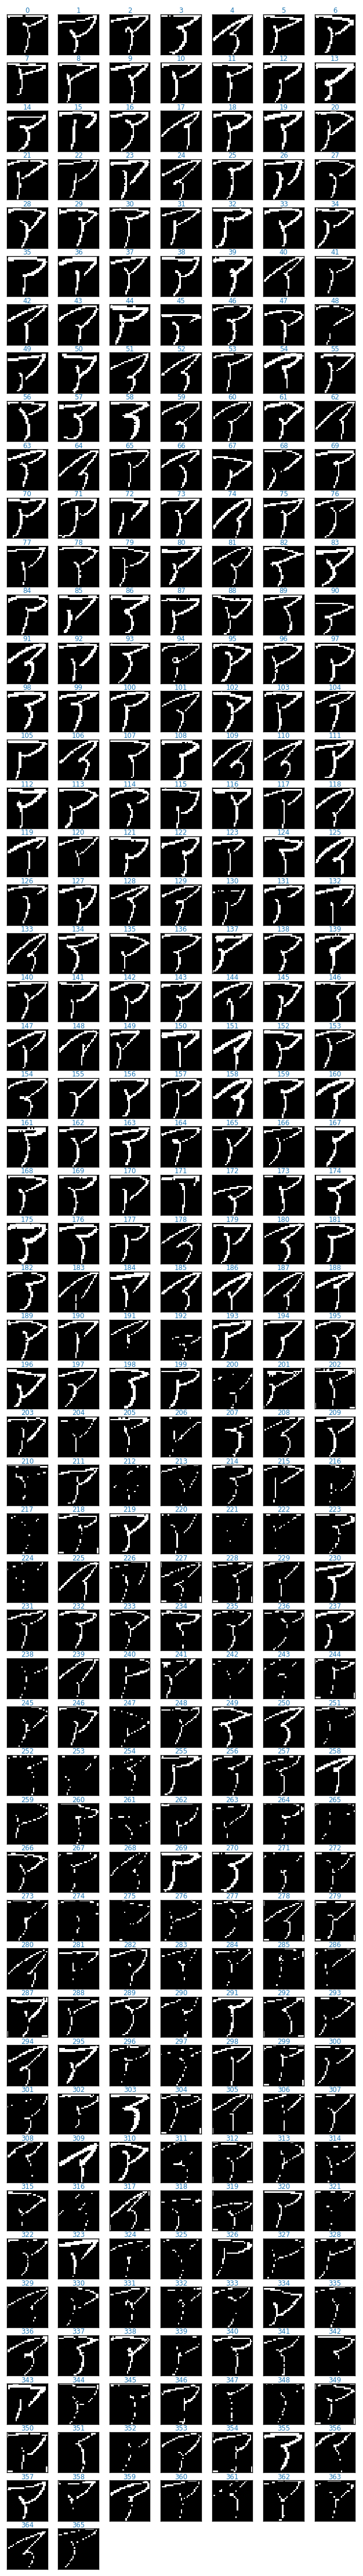

In [61]:
check = new_data_set_a.reshape(len(new_data_set_a), 28, 28)

# matplotlib 出力
n_cols = 7
n_rows = ((len(check)-1)//n_cols)+1
fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(6.5, 0.9*n_rows), dpi=120)
for i,ax in enumerate( np.ravel(ax) ):
  if i < len(check):
    ax.imshow(check[i],interpolation='nearest',vmin=0.,vmax=1.,cmap='Greys')

    # 目盛などを非表示に
    ax.tick_params(axis='both', which='both', left=False, labelleft=False, 
                   bottom=False, labelbottom=False)

    # 青色でインデックスを表示
    ax.set_title(i,fontsize=7,pad=1.5,color='tab:blue')

  else :
    ax.axis('off') # 余白処理
    
plt.show()

データセットのラベルチェック

In [123]:
new_label_id = np.dot(new_label, vec_trans_id.T)
print(new_label_id.shape)
print(new_label_id)

(4793,)
[ 0  0  0 ... 14 14 14]


In [124]:
df = pd.DataFrame({'new_label_id':new_label_id})

new_data_set_image = new_data_set.reshape(len(new_data_set), 28, 28)

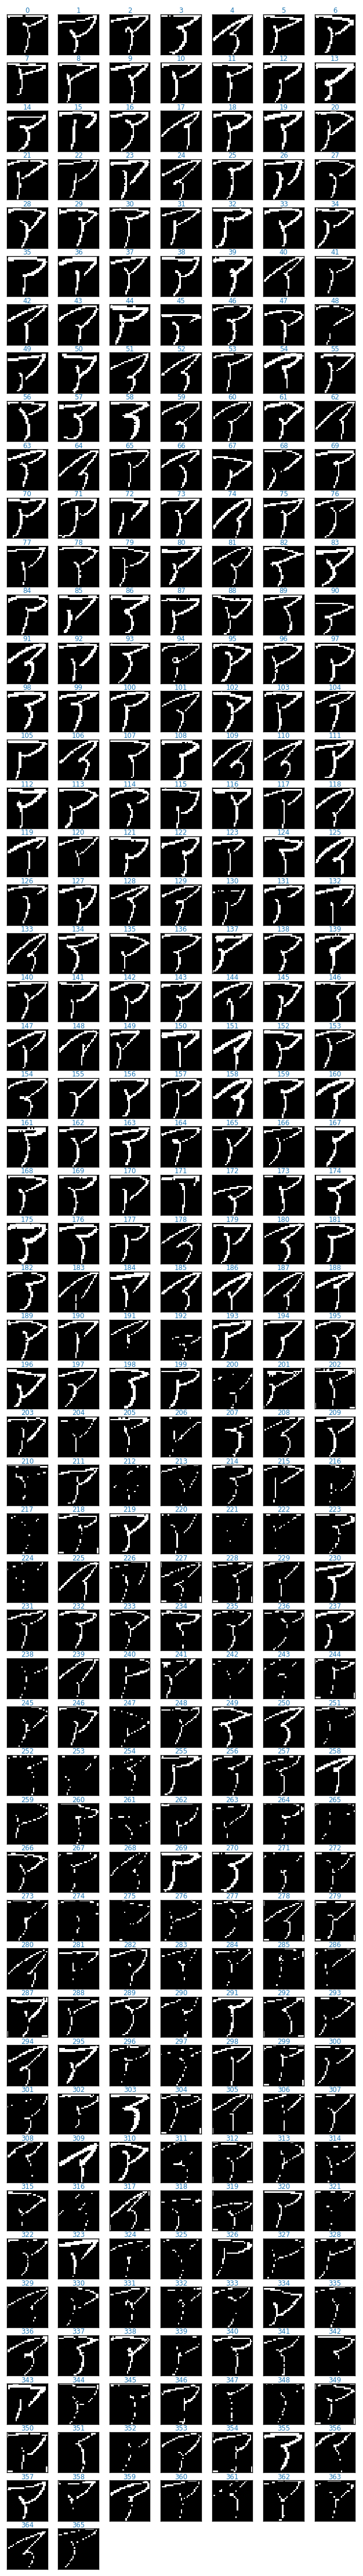

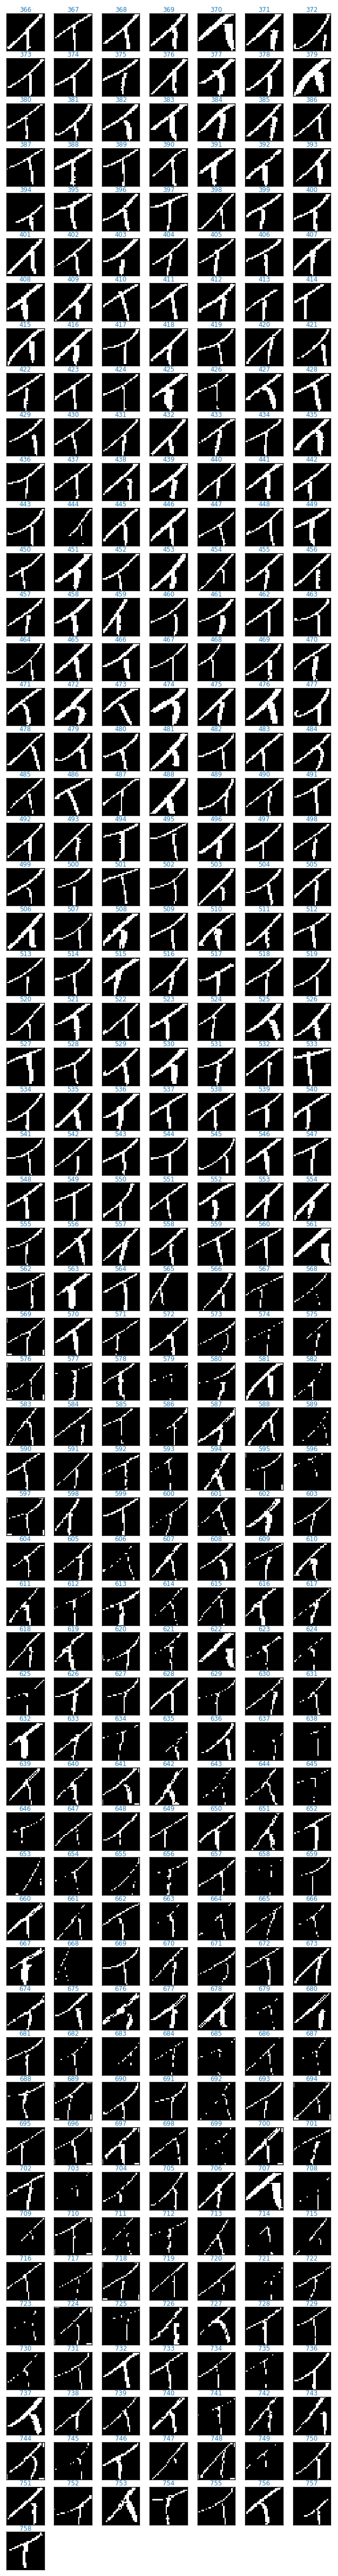

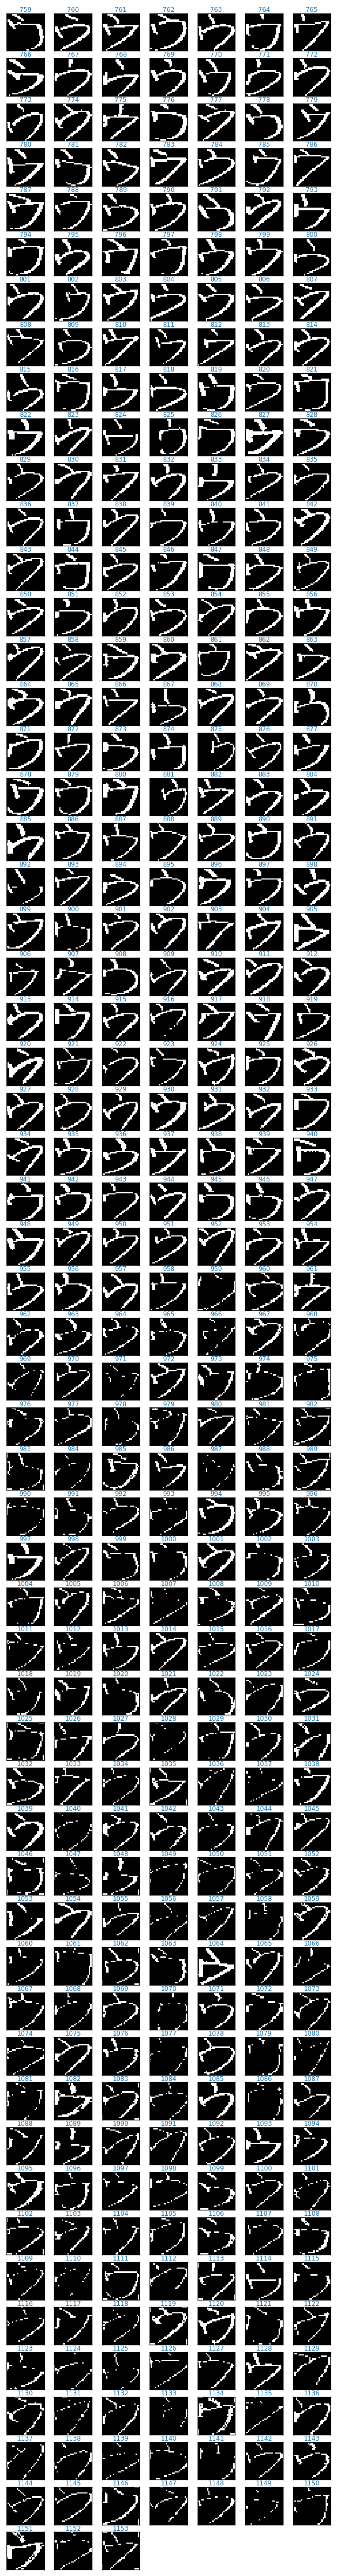

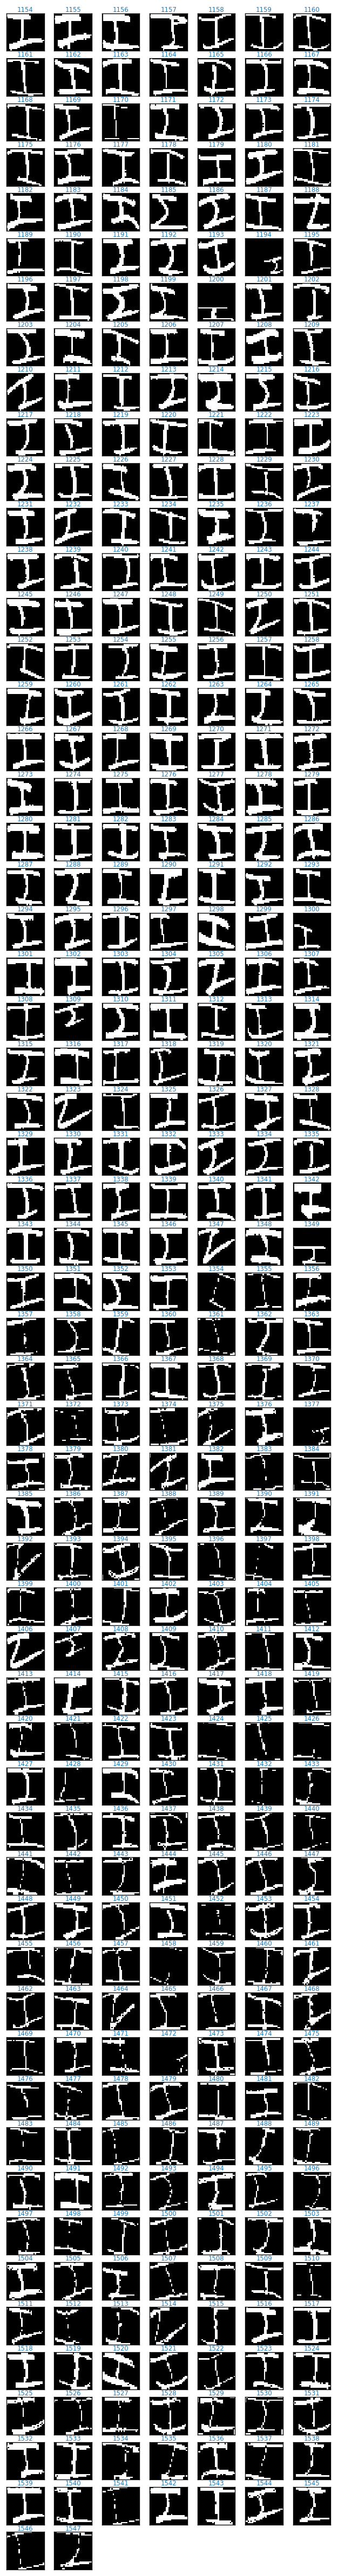

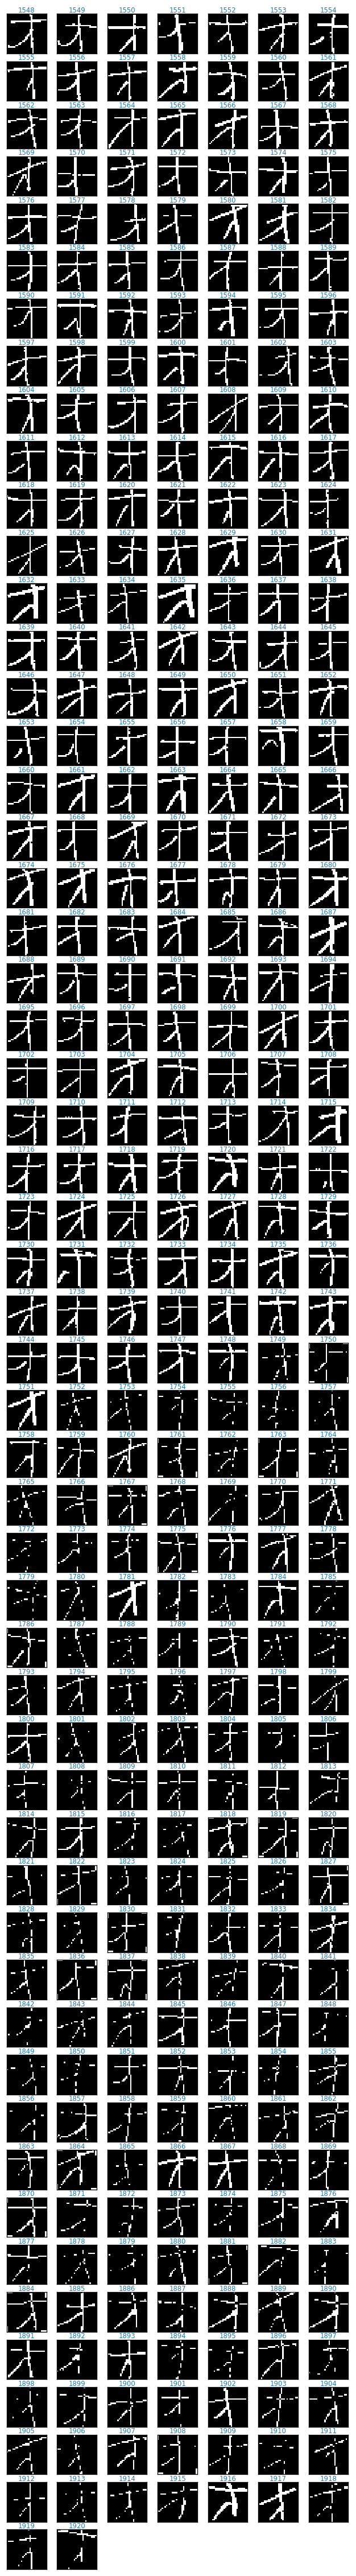

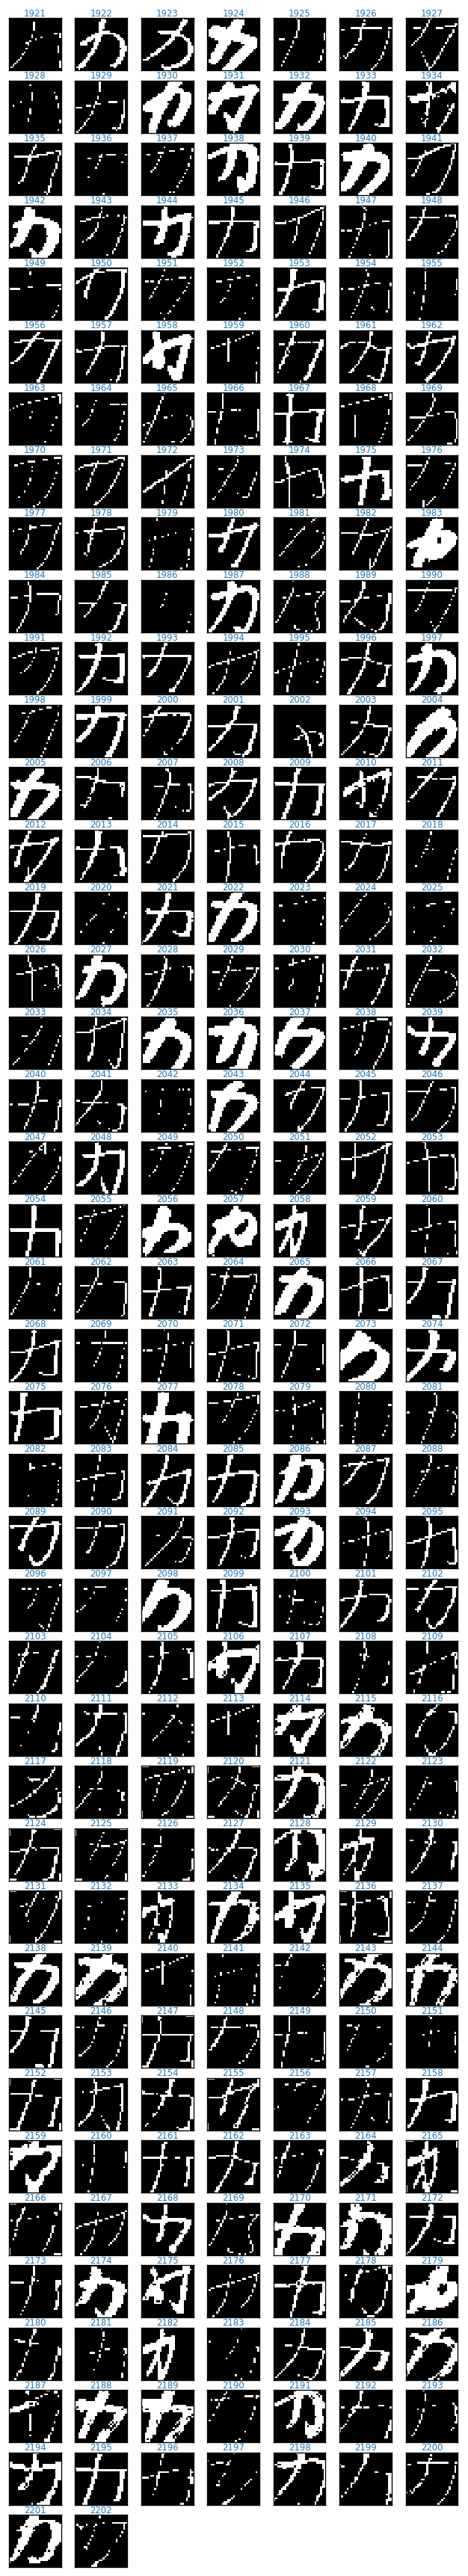

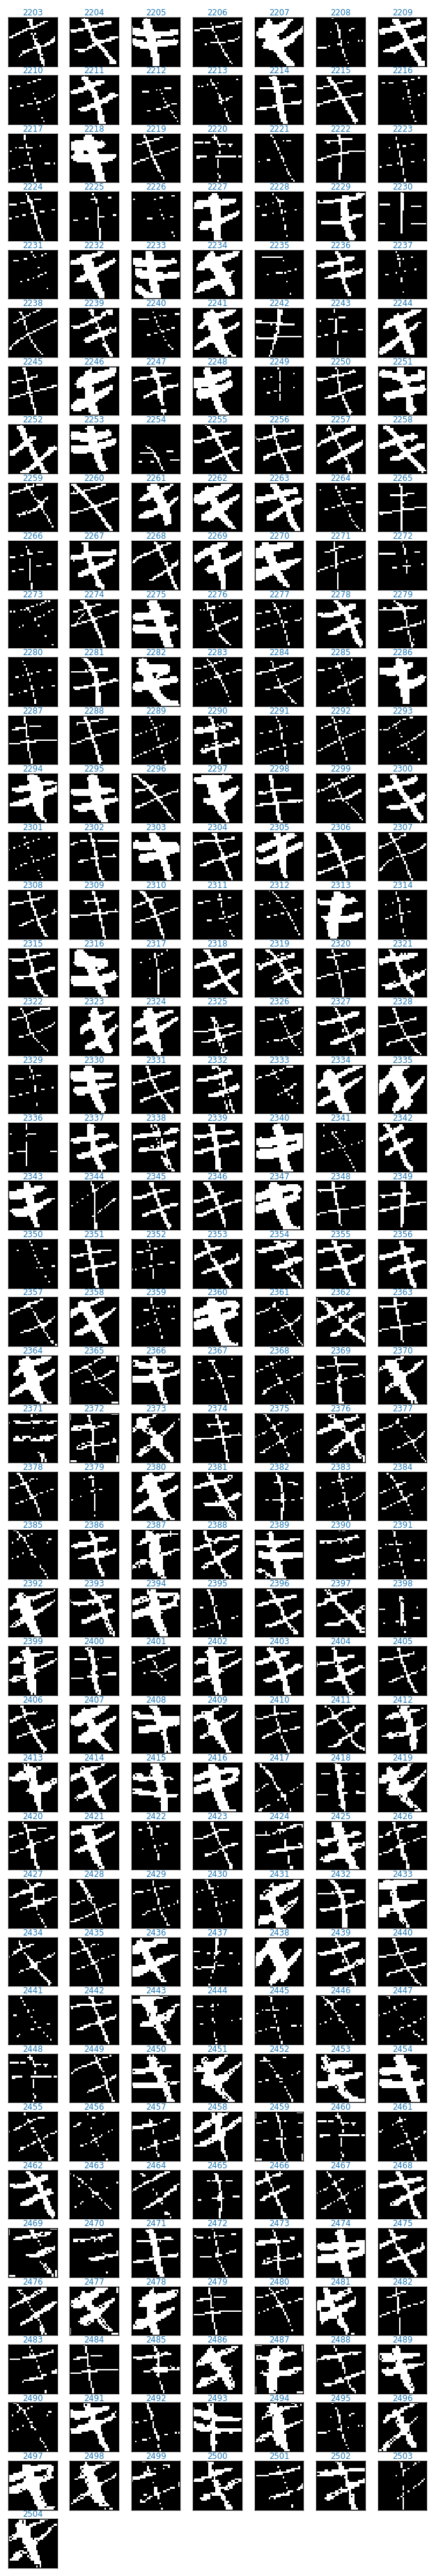

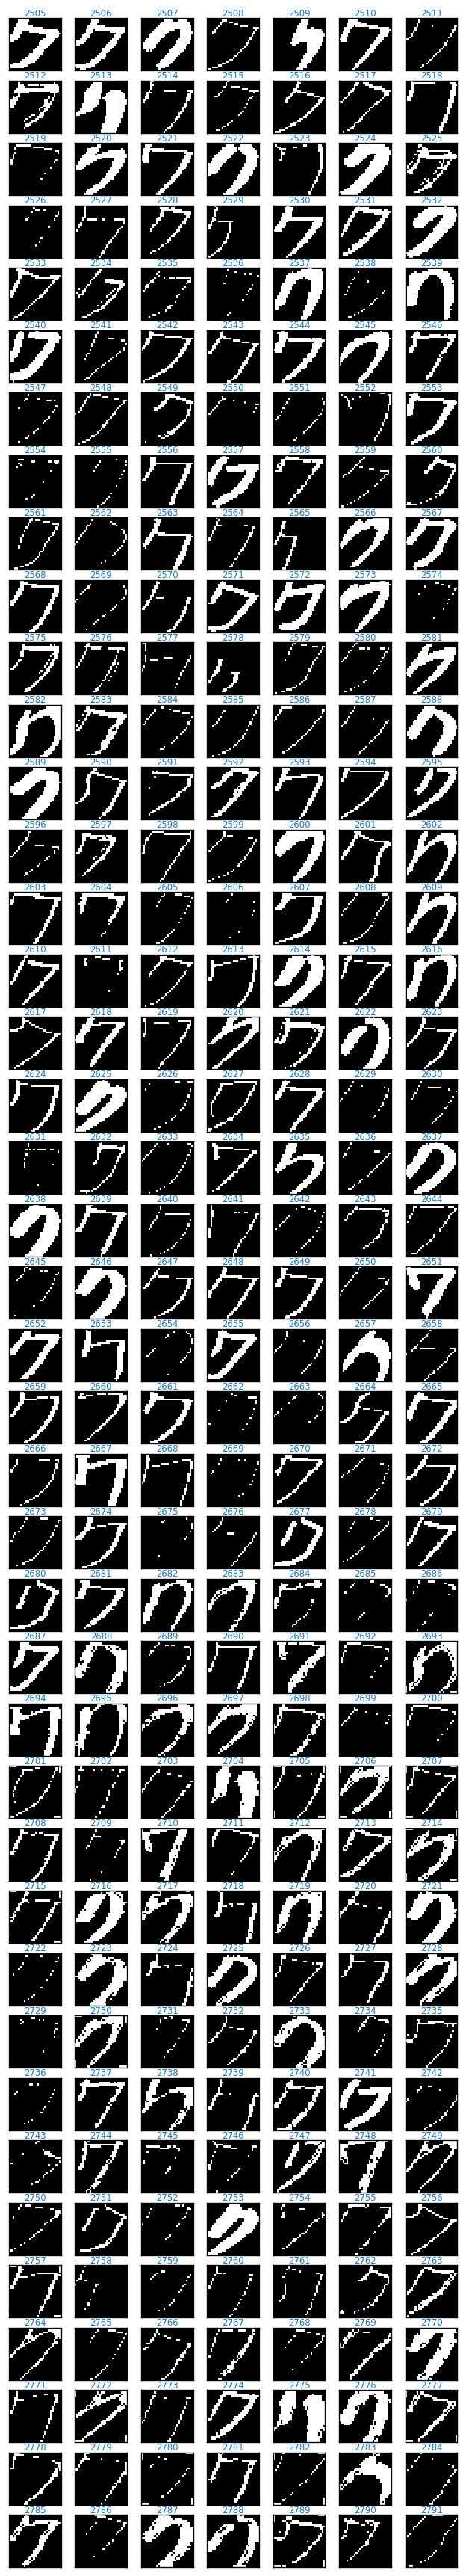

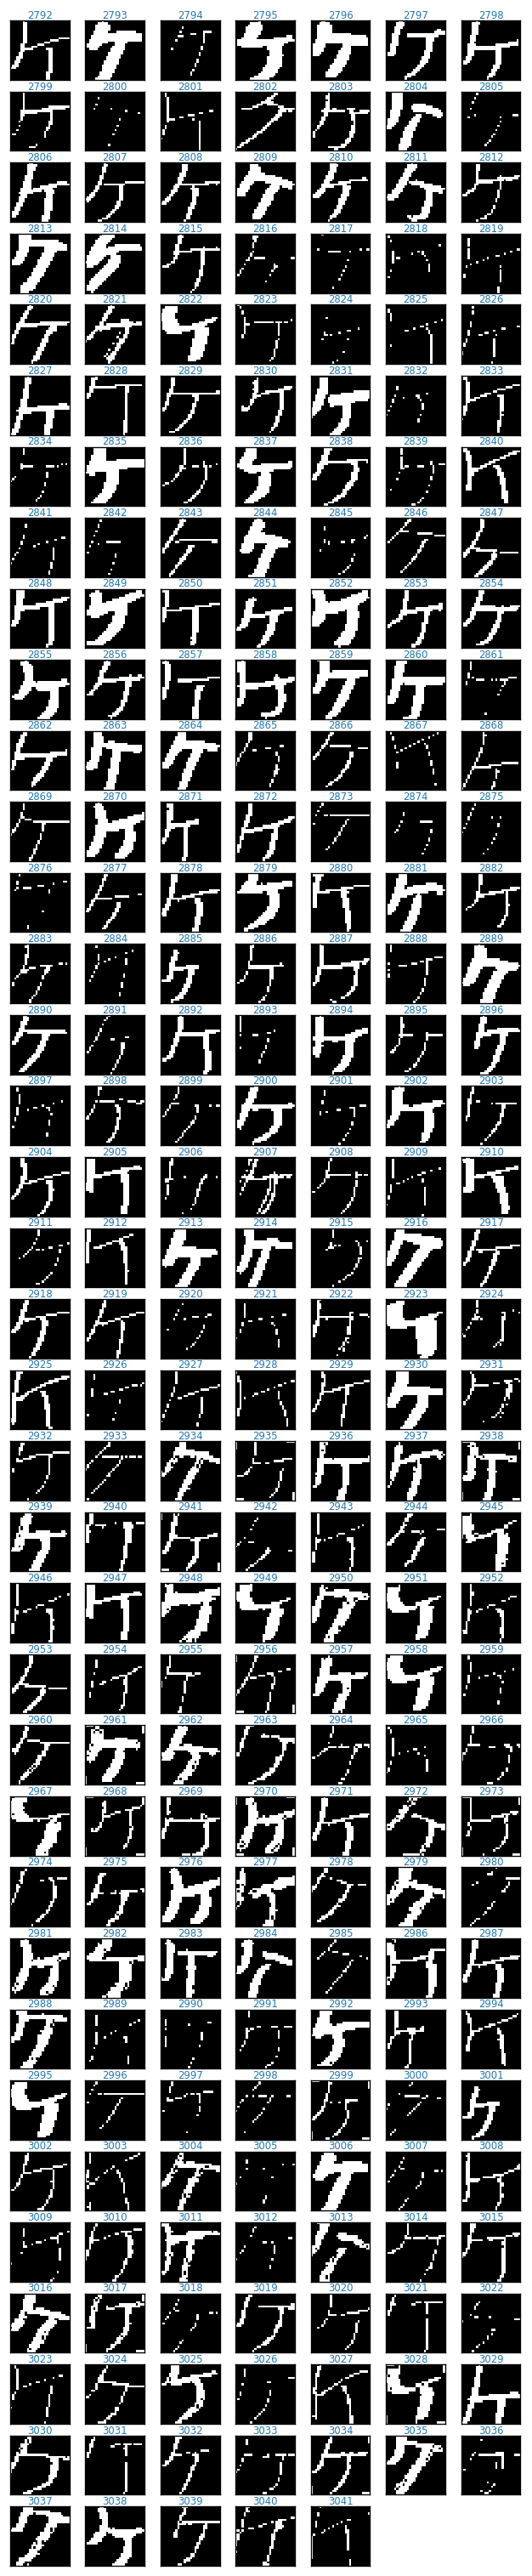

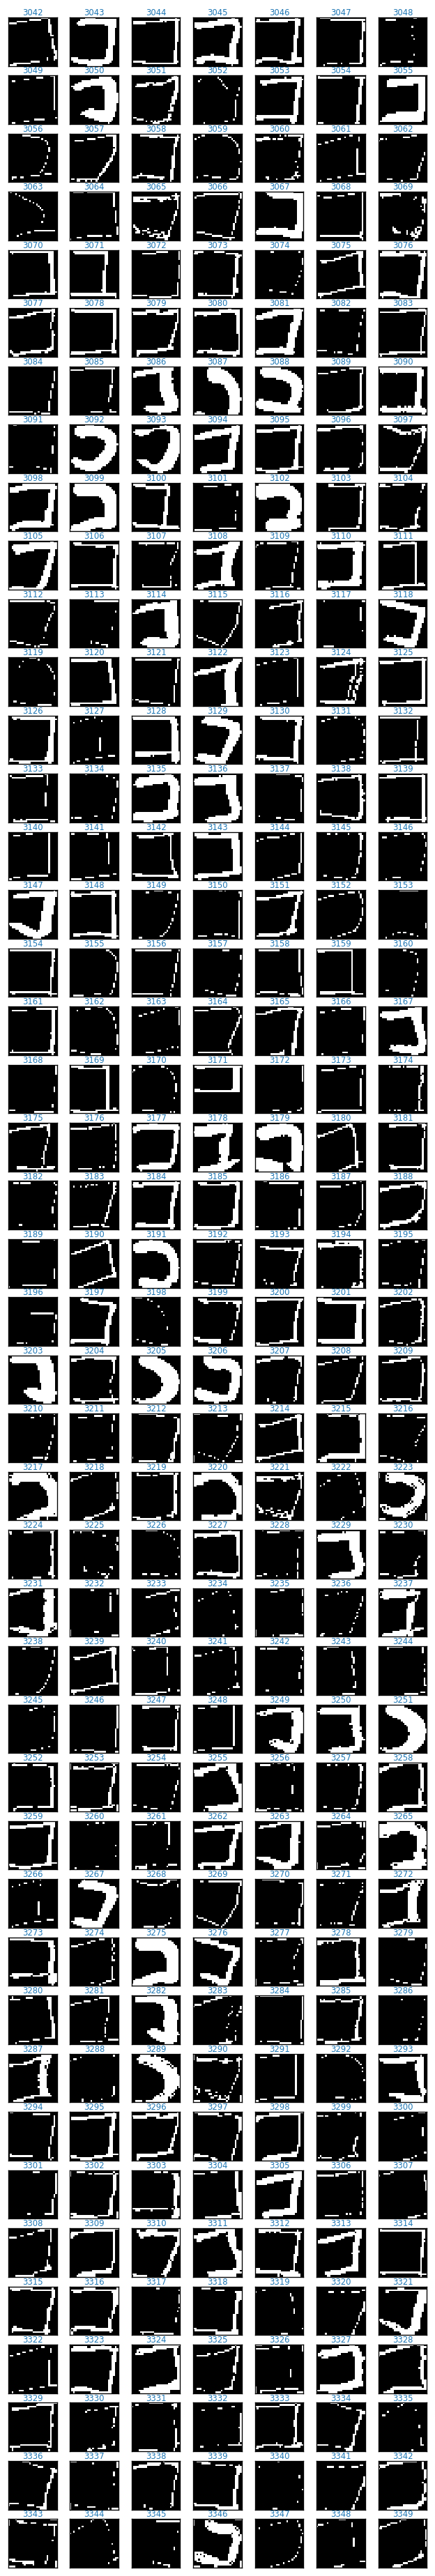

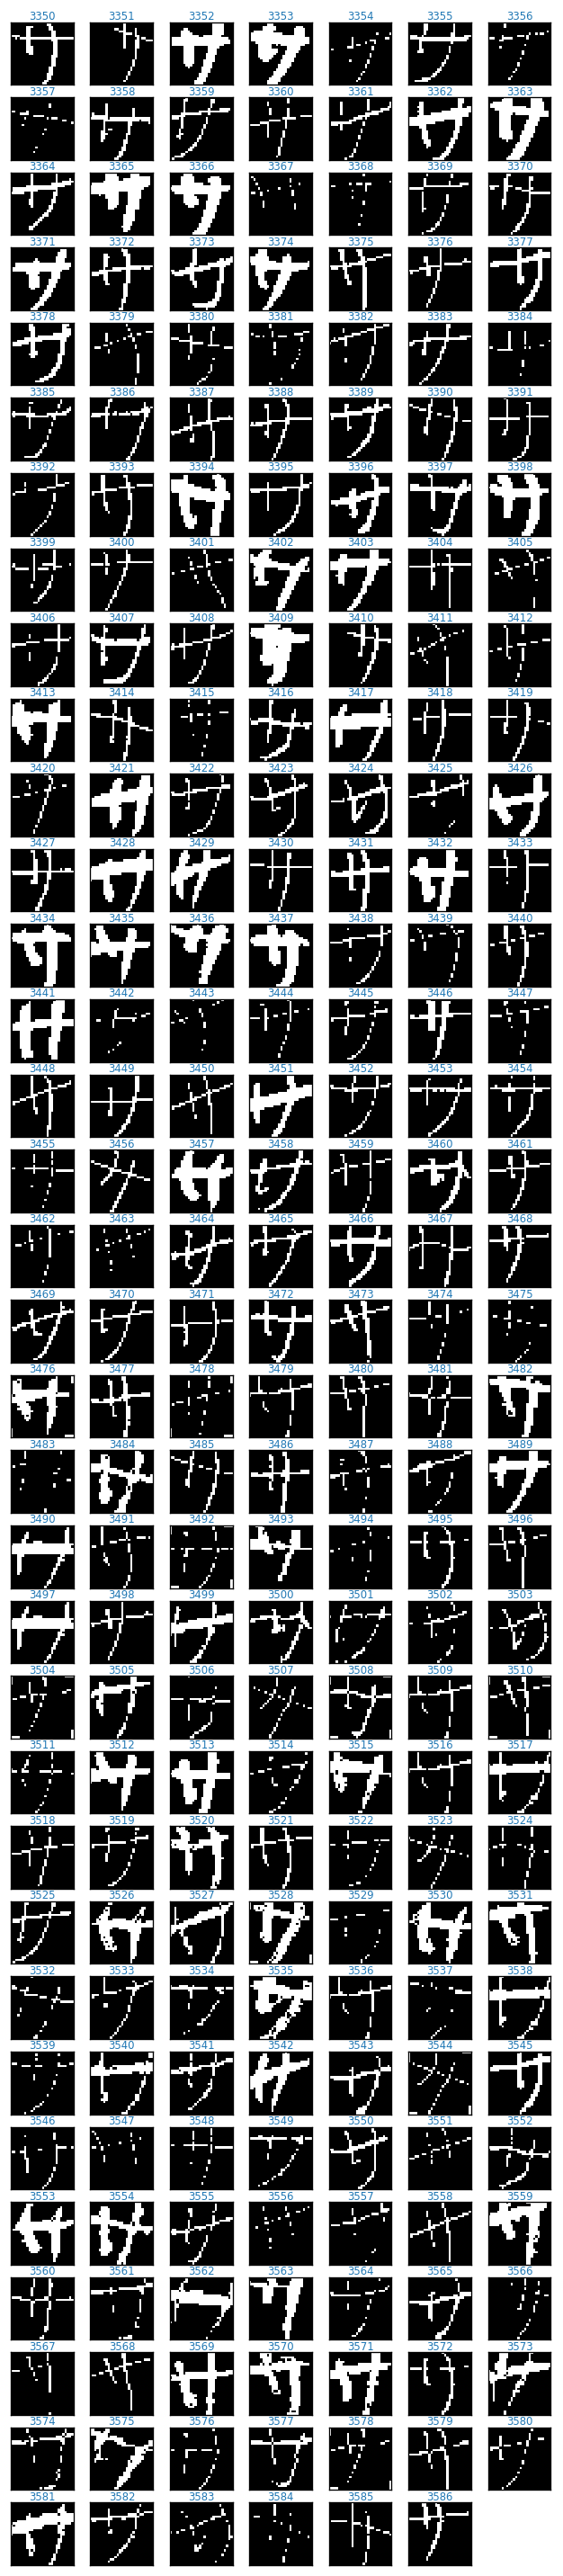

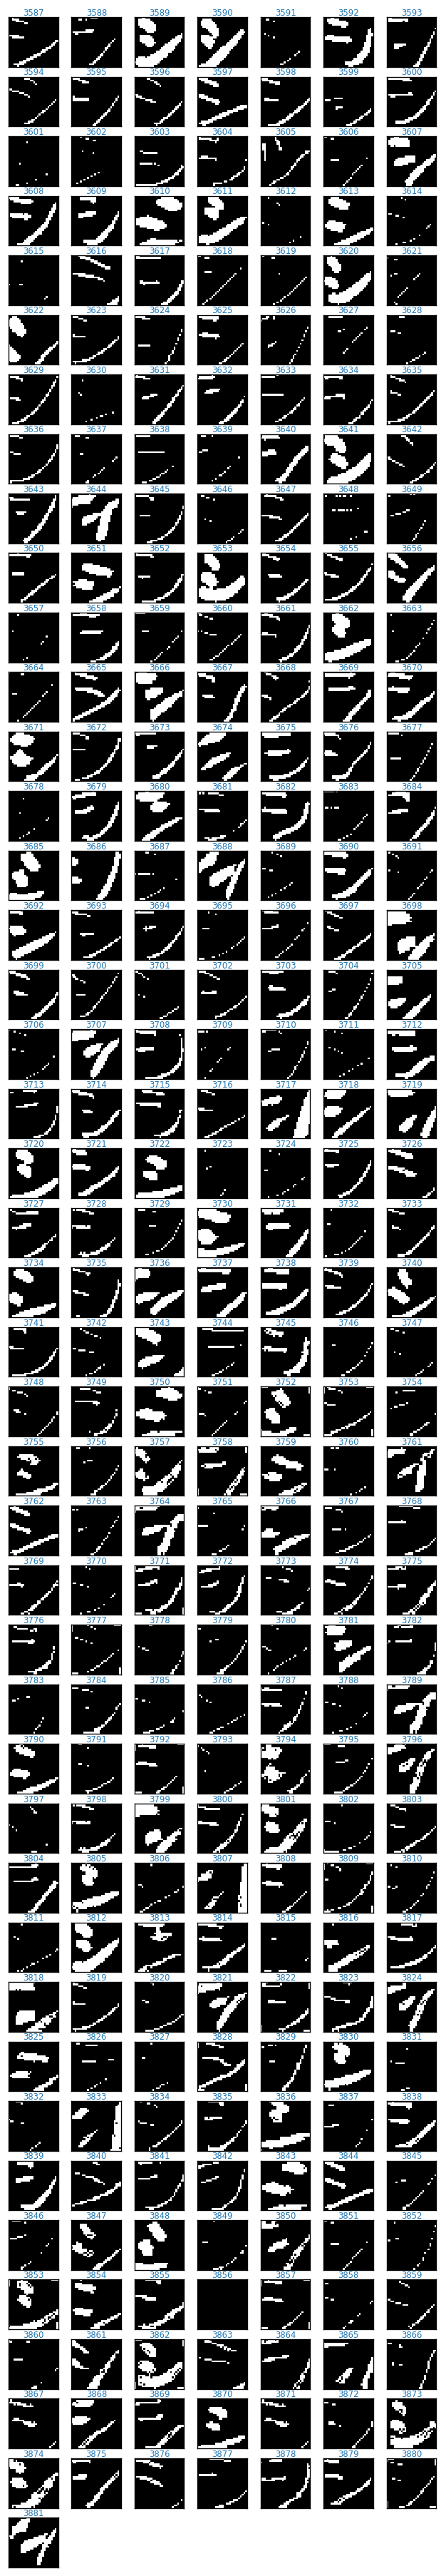

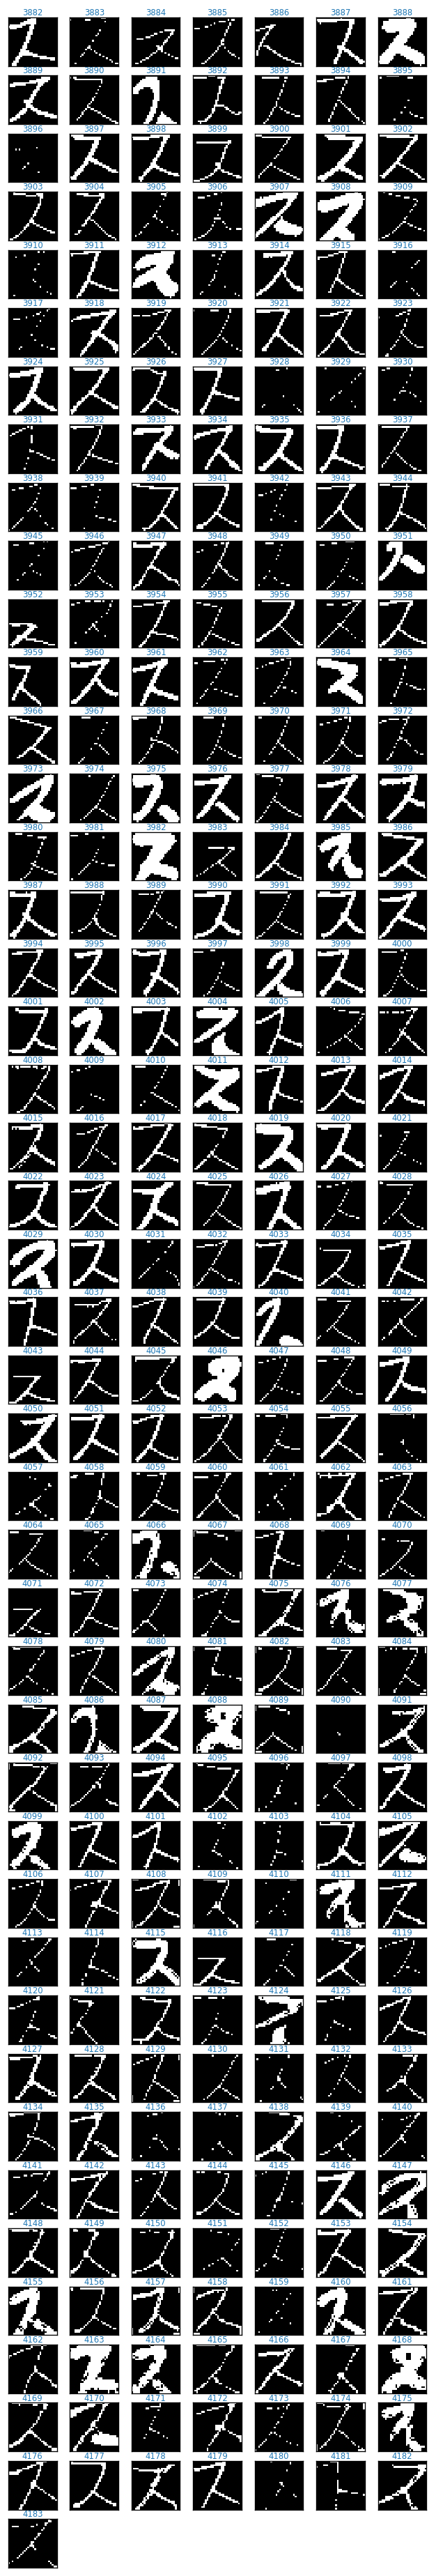

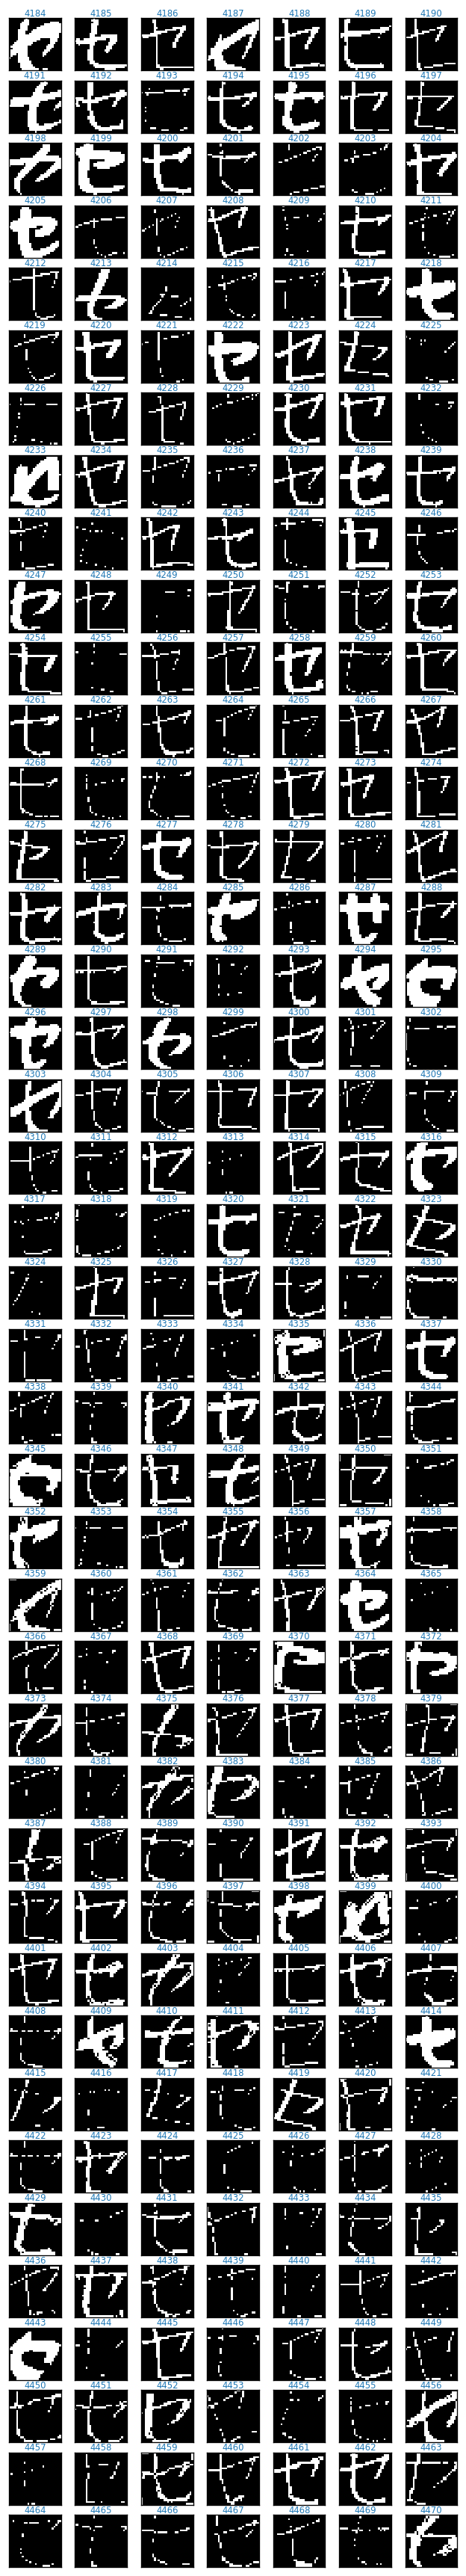

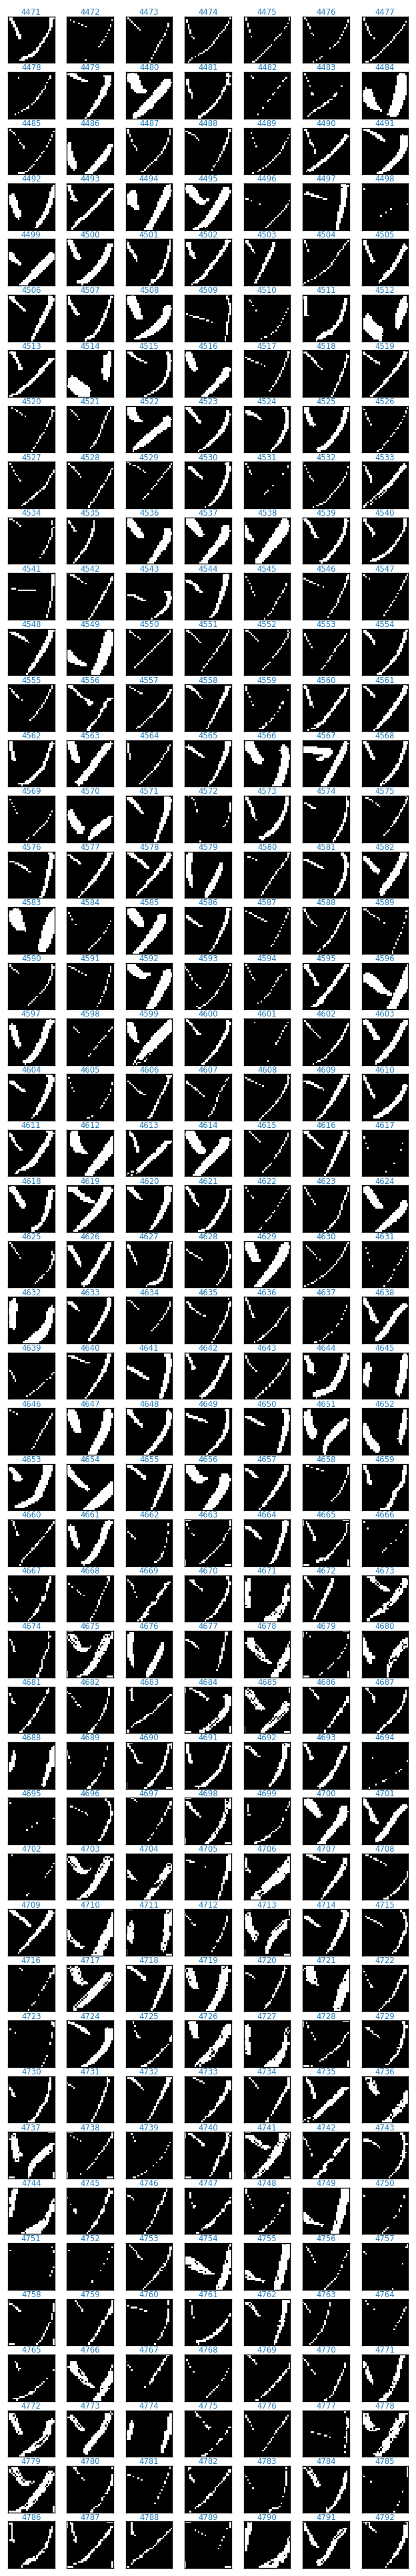

In [125]:
for t in range(0,15):

  # 正解値が t の行を抽出
  index_list = list(df[df['new_label_id']==t].index.values)

  # matplotlib 出力
  n_cols = 7
  n_rows = ((len(index_list)-1)//n_cols)+1
  fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(6.5, 0.9*n_rows), dpi=120)
  for i,ax in enumerate( np.ravel(ax) ):
    if i < len(index_list):

      p = index_list[i]
      ax.imshow(new_data_set_image[p],interpolation='nearest',vmin=0.,vmax=1.,cmap='Greys')

#       # 予測（分類）を左上に表示
#       t = ax.text(1, 1, f'{test_pred[9][p]}', verticalalignment='top', fontsize=8, color='tab:red')
#       t.set_path_effects([pe.Stroke(linewidth=2, foreground='white'), pe.Normal()]) 

#       # 予測（分離）に対応する出力層のニューロンの値を括弧で表示
#       t = ax.text(5, 2, f'({s_test[p].max():.1f})', verticalalignment='top', fontsize=6, color='tab:red')
#       t.set_path_effects([pe.Stroke(linewidth=2, foreground='white'), pe.Normal()]) 

      # 目盛などを非表示に
      ax.tick_params(axis='both', which='both', left=False, labelleft=False, 
                     bottom=False, labelbottom=False)

      # 青色でインデックスを表示
      ax.set_title(index_list[i],fontsize=7,pad=1.5,color='tab:blue')

    else :
      ax.axis('off') # 余白処理

  plt.show()